**Capstone-Project-Warehouse_and_Retail_Sales.**

**BIA Capstone Project - Warehouse_and_Retail_Sales.**

**Project Status: Completed**

We have partnered with a company at the forefront of wholesale distribution, serving dispensaries and licensed retailers across the United States. With an unwavering commitment to providing top-notch products and unparalleled service, their endeavor is to meet the ever-evolving demands of clients within the rapidly expanding industry landscape.

As part of a continuous effort to enhance operational efficiency and gain deeper market insights, this project is aimed at conducting product clustering analysis using historical sales data. The primary objective is to group similar products based on sales patterns, thereby discerning trends, optimizing inventory management processes, and tailoring our offerings to better align with customer preferences.

### <font size="+2" color='#a30762'><b><i><u>Steps</u>
* <font size="+2" color='#053c96'> <b>Importing Libraries
* <font size="+2" color='#053c96'> <b>Import Data
* <font size="+2" color='#053c96'> <b>Data Summary
* <font size="+2" color='#053c96'> <b>Data Visualization
* <font size="+2" color='#053c96'> <b>Data Cleaning ( EDA )
* <font size="+2" color='#053c96'> <b>Feature Selection
* <font size="+2" color='#053c96'> <b> Model Selection
* <font size="+2" color='#053c96'><b> Hyperparameter Tuning
* <font size="+2" color='#053c96'><b>Conclusion

## Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
    - 2.1 - **[Read Data](#read)**
    - 2.2 - **[Check the Data Type](#dtype)**
    - 2.3 - **[Remove Insignificant Variables](#drop)**
    - 2.4 - **[Outlier Analysis and Treatment](#outliers)**
    - 2.5 - **[Missing Value Treatment](#null)**
    - 2.6 - **[Scale the Data](#scale)**

3. **[K Means Clustering](#kmeans)**
    - 3.1 - **[Optimal Value of K Using Elbow Plot](#elbow)**
    - 3.2 - **[Optimal Value of K Using Silhouette Score](#silhouette)**
    - 3.3 - **[Build the Clusters](#model)**
    - 3.4 - **[Analyze the Clusters](#inter)**

##  <font size="+2" color='#947318'> <b>
# 1. Import Libraries

**Let us import the required libraries.**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

from os import path

from PIL import Image


#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch


import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import Packages
from decimal import Decimal
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

##  <font size="+2" color='#947318'> <b>2. Import Data

In [4]:
working_path = "C:\\Users\\adm\\Desktop\\Product cluster Analysis\\Warehouse_and_Retail_Sales.csv"
df = pd.read_csv(working_path)

In [5]:
data = pd.read_csv("C:\\Users\\adm\\Desktop\\Product cluster Analysis\\Warehouse_and_Retail_Sales.csv")

##  <font size="+2" color='#947318'> <b>3. Basic Data Exploration 

In [6]:
df.head

<bound method NDFrame.head of         YEAR  MONTH                           SUPPLIER ITEM CODE  \
0       2020      1  REPUBLIC NATIONAL DISTRIBUTING CO    100009   
1       2020      1                          PWSWN INC    100024   
2       2020      1            RELIABLE CHURCHILL LLLP      1001   
3       2020      1          LANTERNA DISTRIBUTORS INC    100145   
4       2020      1               DIONYSOS IMPORTS INC    100293   
...      ...    ...                                ...       ...   
307640  2020      9                           DOPS INC     97896   
307641  2020      9                 ANHEUSER BUSCH INC     97918   
307642  2020      9                       HEINEKEN USA     97942   
307643  2020      9            RELIABLE CHURCHILL LLLP     97950   
307644  2020      9            RELIABLE CHURCHILL LLLP     97969   

                                   ITEM DESCRIPTION ITEM TYPE  RETAIL SALES  \
0                               BOOTLEG RED - 750ML      WINE          0.0

In [7]:
df.tail(10)


,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
307635,2020,9,E & J GALLO WINERY,83198,STORYPOINT CHARD - 750ML,WINE,0.00,0.0,0.00
307636,2020,9,PERNOD RICARD USA LLC,83887,KENWOOD S/BLC - 750ML,WINE,0.97,2.0,4.00
307637,2020,9,SAZERAC CO,84691,DI PADRINO DRY VERMOUTH - 750ML,WINE,0.49,0.0,0.00
307638,2020,9,ANHEUSER BUSCH INC,97845,SPATEN PREMIUM LAGER 4/6NR - 12OZ,BEER,34.04,22.0,149.00
307639,2020,9,ANHEUSER BUSCH INC,97861,SPATEN OKTOBERFEST 4/6 NR - 12OZ,BEER,51.00,0.0,0.00
307640,2020,9,DOPS INC,97896,ST PETERS ORGANIC ENG ALE NR 12/CS - 16.9OZ,BEER,0.00,0.0,1.00
307641,2020,9,ANHEUSER BUSCH INC,97918,STELLA ARTOIS 2/12 NR - 11.2OZ,BEER,372.45,315.0,3586.88
307642,2020,9,HEINEKEN USA,97942,TECATE 4/6 LNNR - 12OZ,BEER,7.79,0.0,4.00
307643,2020,9,RELIABLE CHURCHILL LLLP,97950,S SMITH WINTER WELCOME NR 12/CS - 18.7OZ,BEER,0.00,0.0,2.00
307644,2020,9,RELIABLE CHURCHILL LLLP,97969,S SMITH WINTER WELCOME 4/6NR - 12OZ,BEER,0.00,0.0,1.00


### 3.2 df.shape

In [8]:
df.shape

(307645, 9)

### 3.3 df.info()

In [9]:
df.info

<bound method DataFrame.info of         YEAR  MONTH                           SUPPLIER ITEM CODE  \
0       2020      1  REPUBLIC NATIONAL DISTRIBUTING CO    100009   
1       2020      1                          PWSWN INC    100024   
2       2020      1            RELIABLE CHURCHILL LLLP      1001   
3       2020      1          LANTERNA DISTRIBUTORS INC    100145   
4       2020      1               DIONYSOS IMPORTS INC    100293   
...      ...    ...                                ...       ...   
307640  2020      9                           DOPS INC     97896   
307641  2020      9                 ANHEUSER BUSCH INC     97918   
307642  2020      9                       HEINEKEN USA     97942   
307643  2020      9            RELIABLE CHURCHILL LLLP     97950   
307644  2020      9            RELIABLE CHURCHILL LLLP     97969   

                                   ITEM DESCRIPTION ITEM TYPE  RETAIL SALES  \
0                               BOOTLEG RED - 750ML      WINE          0

### 3.4 df.columns

In [10]:
df.columns

Index(['YEAR', 'MONTH', 'SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION',
       'ITEM TYPE', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES'],
      dtype='object')

### 3.5 Defining *DataInfoAll*

In [11]:
def DataInfoAll(df):
    print(f"Dataset Shape: {df.shape}")
    print("-"*125)
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    return summary

In [12]:
DataInfoAll(df)

Dataset Shape: (307645, 9)
-----------------------------------------------------------------------------------------------------------------------------


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,YEAR,int64,0,4,2020,2020
1,MONTH,int64,0,12,1,1
2,SUPPLIER,object,167,396,REPUBLIC NATIONAL DISTRIBUTING CO,PWSWN INC
3,ITEM CODE,object,0,34056,100009,100024
4,ITEM DESCRIPTION,object,0,34822,BOOTLEG RED - 750ML,MOMENT DE PLAISIR - 750ML
5,ITEM TYPE,object,1,8,WINE,WINE
6,RETAIL SALES,float64,3,10674,0.0,0.0
7,RETAIL TRANSFERS,float64,0,2504,0.0,1.0
8,WAREHOUSE SALES,float64,0,4895,2.0,4.0


### 3.6  Checking duplicate values

In [13]:
NaN_Checker = pd.DataFrame({"No Of Total Values": df.shape[0] , "No of NaN values": df.isnull().sum(),
                    "%age of NaN values" : round((df.isnull().sum()/ df.shape[0])*100 , 2) })
NaN_Checker.sort_values("No of NaN values" , ascending = False)

,No Of Total Values,No of NaN values,%age of NaN values
SUPPLIER,307645,167,0.05
RETAIL SALES,307645,3,0.00
ITEM TYPE,307645,1,0.00
YEAR,307645,0,0.00
MONTH,307645,0,0.00
ITEM CODE,307645,0,0.00
ITEM DESCRIPTION,307645,0,0.00
RETAIL TRANSFERS,307645,0,0.00
WAREHOUSE SALES,307645,0,0.00


In [14]:
plot_nan = df.isna()
plot_nan.head(2)

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False


<Axes: >

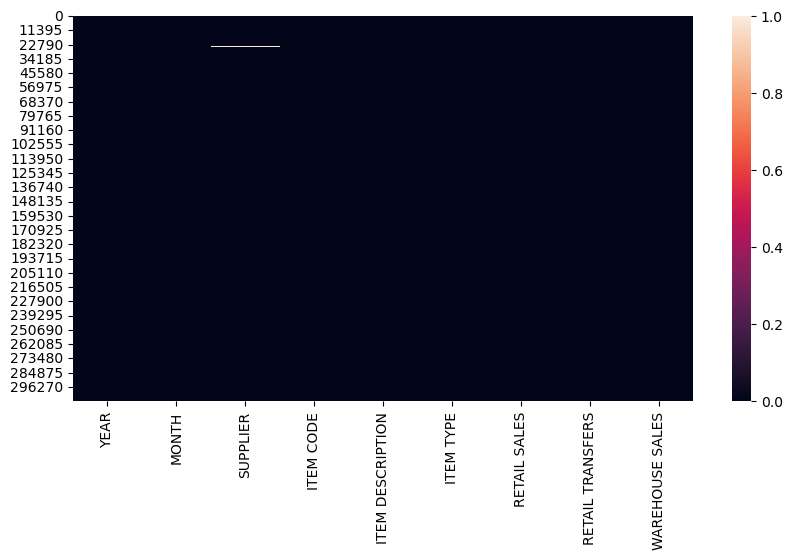

In [15]:
plt.figure( figsize = (10 , 5))
sns.heatmap(plot_nan)

* Using barplot to check the no of NaN values present in this dataset

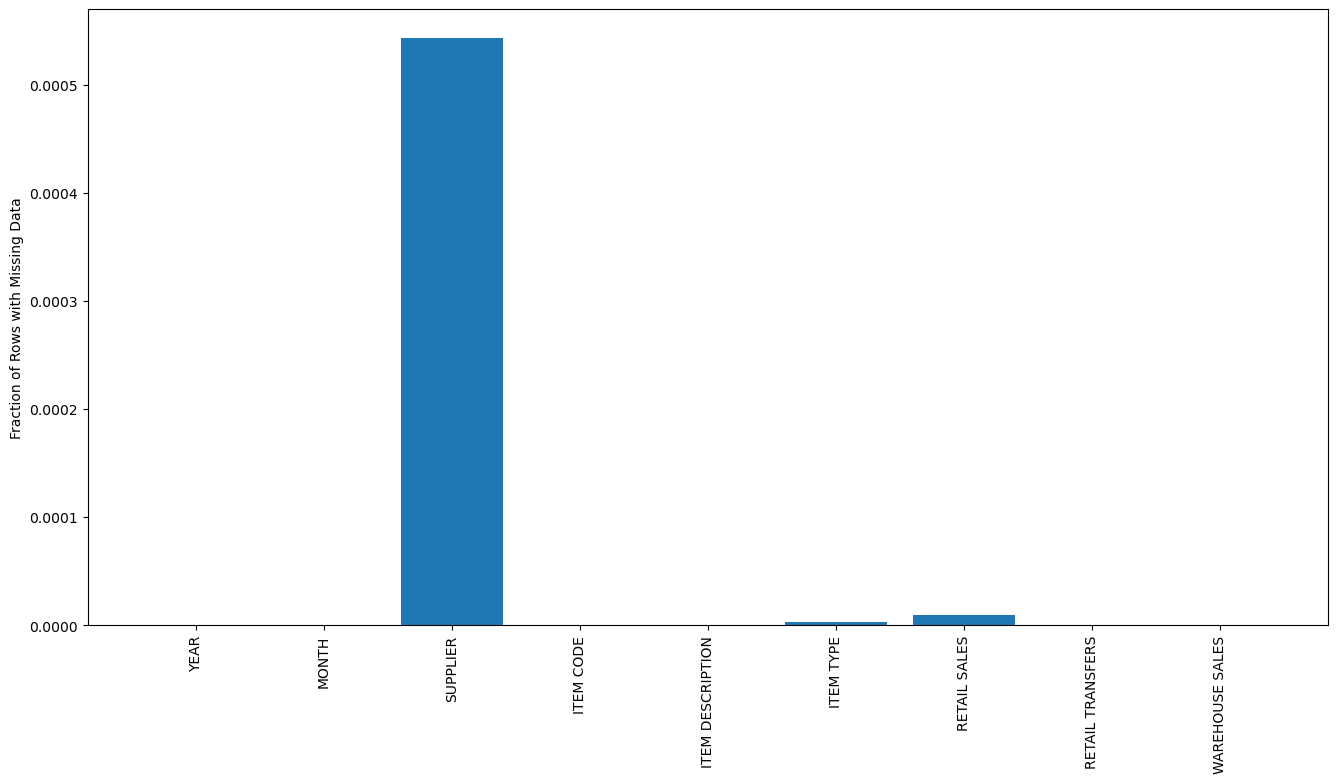

In [16]:
# Calculate the fraction of rows with missing data for each column
null_counts = df.isnull().sum() / len(df)

# Create a bar plot to visualize the fraction of rows with missing data for each column
plt.figure(figsize=(16, 8))
plt.xticks(np.arange(len(null_counts)), null_counts.index, rotation='vertical')
plt.ylabel('Fraction of Rows with Missing Data')
plt.bar(np.arange(len(null_counts)), null_counts)
plt.show()


In [17]:
import pandas as pd

# Calculate the percentage of missing values in the WAREHOUSE SALES column
missing_percentage = df['WAREHOUSE SALES'].isnull().mean() * 100
print("Percentage of missing values in WAREHOUSE SALES column:", missing_percentage)


Percentage of missing values in WAREHOUSE SALES column: 0.0


In [18]:
import pandas as pd

# Calculate the percentage of missing values in the WAREHOUSE SALES column
missing_percentage = df['RETAIL SALES'].isnull().mean() * 100
print("Percentage of missing values in WAREHOUSE SALES column:", missing_percentage)

Percentage of missing values in WAREHOUSE SALES column: 0.0009751499293016301


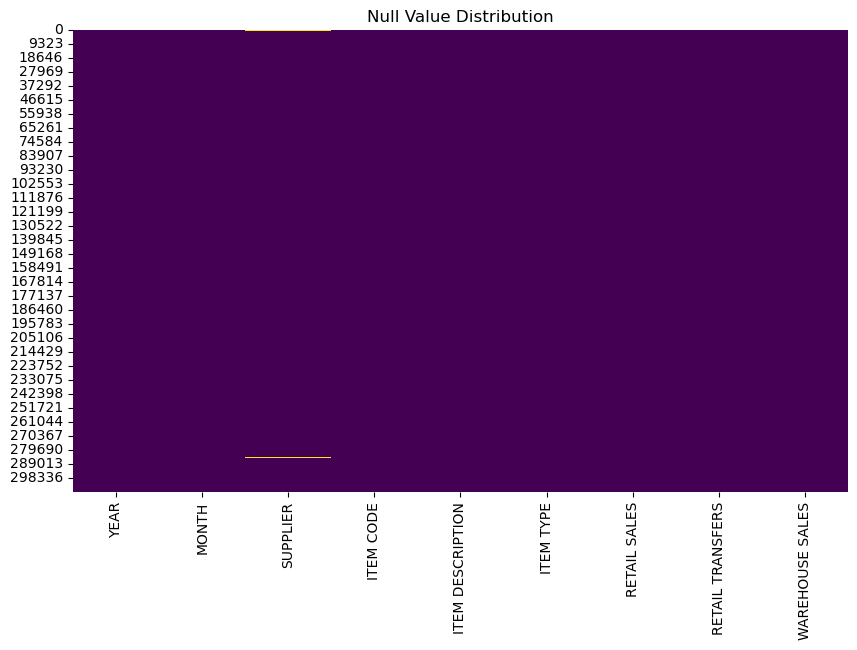

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of null values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Null Value Distribution')
plt.show()


* Supplier contains large number of null values so we will drop it


In [20]:
print(f"Before dropping the NaN values from date_added the shape was {df.shape}")


Before dropping the NaN values from date_added the shape was (307645, 9)


### 3.7 Looking for unique values

In [21]:
df.nunique()

YEAR                    4
MONTH                  12
SUPPLIER              396
ITEM CODE           34056
ITEM DESCRIPTION    34822
ITEM TYPE               8
RETAIL SALES        10674
RETAIL TRANSFERS     2504
WAREHOUSE SALES      4895
dtype: int64

* Unique values of type column

In [22]:
df['YEAR'].unique()

array([2020, 2017, 2018, 2019], dtype=int64)

In [23]:
df['MONTH'].unique()

array([ 1,  7,  3,  9,  6,  8, 12, 10, 11,  2,  4,  5], dtype=int64)

In [24]:
df['YEAR'].unique()

array([2020, 2017, 2018, 2019], dtype=int64)

In [25]:
df['ITEM TYPE'].unique()

array(['WINE', 'BEER', 'LIQUOR', 'STR_SUPPLIES', 'KEGS', 'REF', 'DUNNAGE',
       'NON-ALCOHOL', nan], dtype=object)

In [26]:
df['RETAIL SALES'].unique()

array([  0.  ,   0.82,   2.76, ..., 163.72,  65.43, 372.45])

### 3.8 Handle Missing Data (Drop the NaN)

In [27]:
df.dropna(inplace=True)

### 3.9 Converting Data Types

In [28]:
df['YEAR'] = pd.to_datetime(data['YEAR'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


data.info()

In [29]:
df['ITEM TYPE'].value_counts().to_frame().T

ITEM TYPE,WINE,LIQUOR,BEER,KEGS,NON-ALCOHOL,STR_SUPPLIES,REF,DUNNAGE
count,187640,64910,42413,10146,1899,318,79,72


* #### 4.6.4 Checking **outliers** on *Item Type* column

### Creating additional features


In [30]:
df.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,307477,307477.000000,307477.000000,307477.000000,307477.000000
mean,1970-01-01 00:00:00.000002018,6.424064,7.003644,6.938177,25.375561
min,1970-01-01 00:00:00.000002017,1.000000,-6.490000,-38.490000,-4996.000000
25%,1970-01-01 00:00:00.000002017,3.000000,0.000000,0.000000,0.000000
50%,1970-01-01 00:00:00.000002019,7.000000,0.320000,0.000000,1.000000
75%,1970-01-01 00:00:00.000002019,9.000000,3.260000,3.000000,5.000000
max,1970-01-01 00:00:00.000002020,12.000000,1816.490000,1990.830000,18317.000000
std,NaN,3.461853,30.387012,30.244239,249.500572


# Step 4: Exploratory Data Analysis (EDA)


### a. Time-Series Analysis (Line Chart)

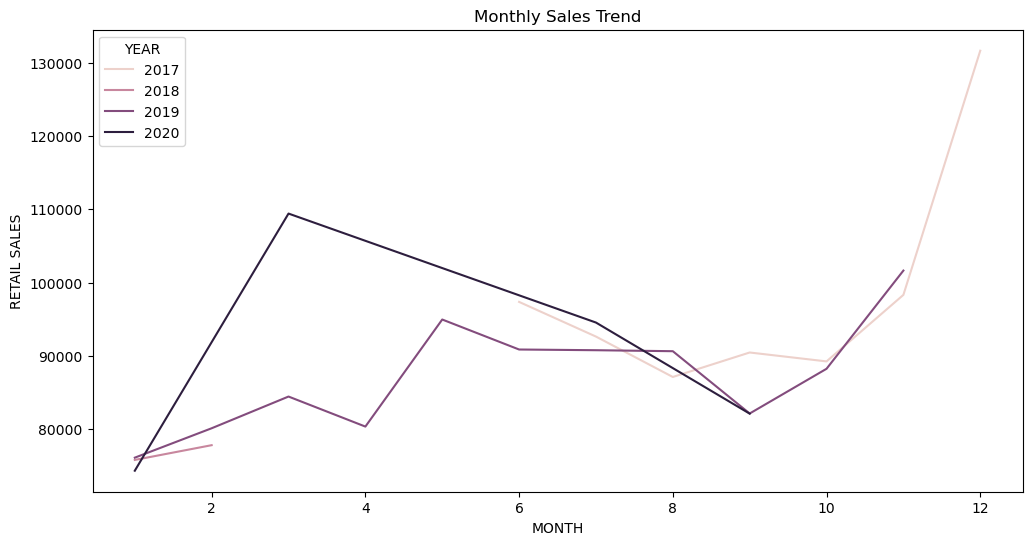

,YEAR,MONTH,RETAIL SALES
0,2017,6,97357.26
1,2017,7,92625.29
2,2017,8,87111.78
3,2017,9,90452.60
4,2017,10,89236.96
5,2017,11,98316.19
6,2017,12,131634.49
7,2018,1,75791.77
8,2018,2,77804.13
9,2019,1,76100.53


In [31]:
# createa a dataframe called monthly sales using groupby function in pandas
monthly_sales = data.groupby(['YEAR', 'MONTH'])['RETAIL SALES'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='MONTH', y='RETAIL SALES', hue='YEAR')
plt.title('Monthly Sales Trend')
plt.show()

monthly_sales

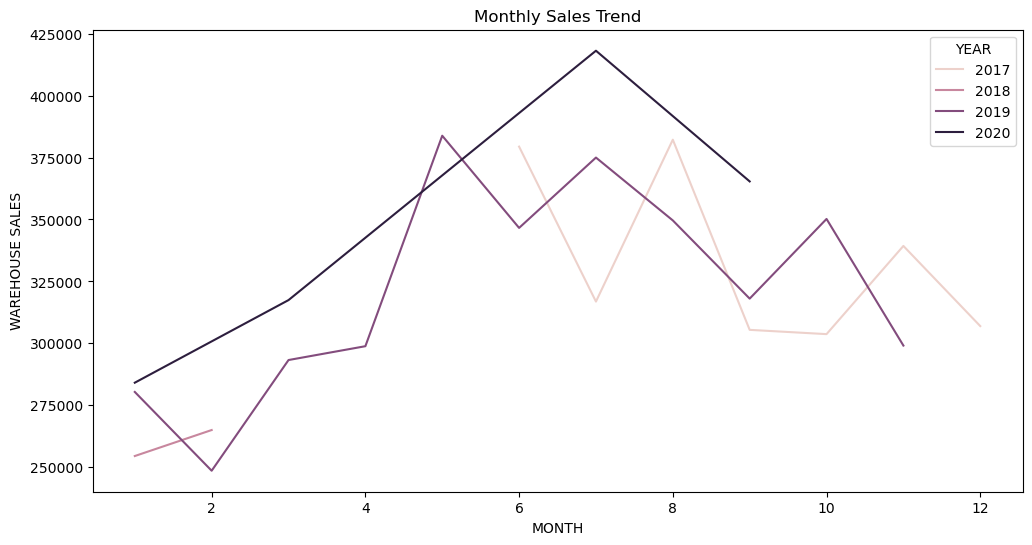

,YEAR,MONTH,WAREHOUSE SALES
0,2017,6,379390.83
1,2017,7,316853.29
2,2017,8,382186.69
3,2017,9,305440.53
4,2017,10,303714.91
5,2017,11,339305.66
6,2017,12,306957.22
7,2018,1,254517.67
8,2018,2,265008.52
9,2019,1,280381.24


In [32]:
# createa a dataframe called monthly sales using groupby function in pandas
monthly_sales = data.groupby(['YEAR', 'MONTH'])['WAREHOUSE SALES'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='MONTH', y='WAREHOUSE SALES', hue='YEAR')
plt.title('Monthly Sales Trend')
plt.show()

monthly_sales

### 4.1 Characteristics Analysis

### a) Sales Pattern

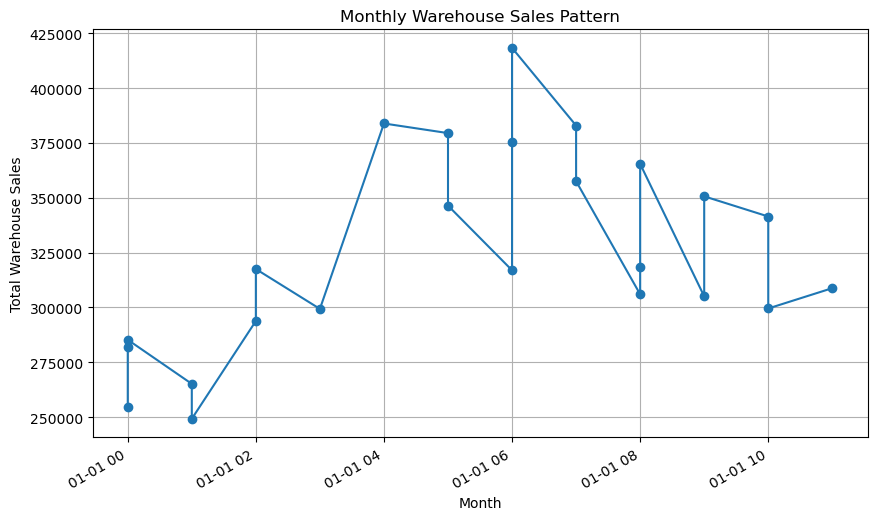

In [33]:

# Aggregate monthly sales
monthly_sales = df.groupby(['YEAR', 'MONTH'])['WAREHOUSE SALES'].sum()

# Convert index to datetime format for better plotting
monthly_sales.index = pd.to_datetime(monthly_sales.index.map(lambda x: f"{x[0]}-{x[1]}"))

# Plot sales pattern
plt.figure(figsize=(10, 6))
monthly_sales.plot(marker='o', linestyle='-')
plt.title('Monthly Warehouse Sales Pattern')
plt.xlabel('Month')
plt.ylabel('Total Warehouse Sales')
plt.grid(True)
plt.show()


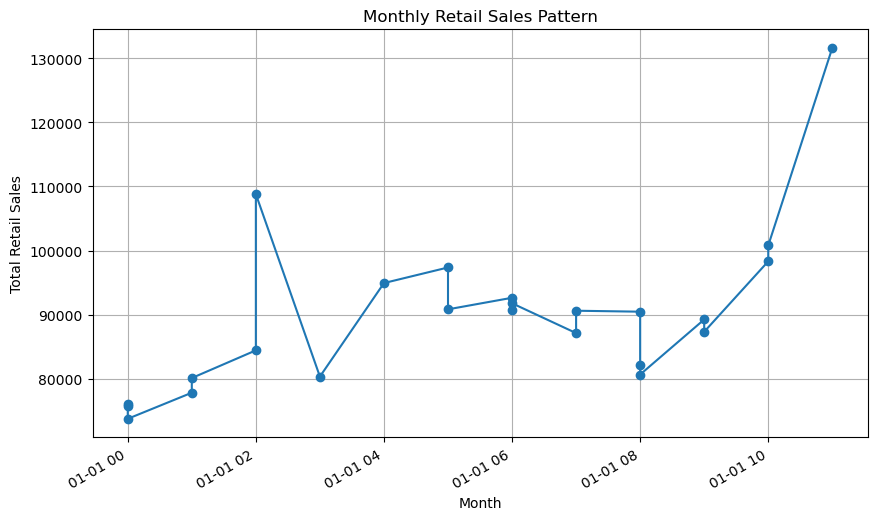

In [34]:
# Aggregate monthly sales
monthly_sales = df.groupby(['YEAR', 'MONTH'])['RETAIL SALES'].sum()

# Convert index to datetime format for better plotting
monthly_sales.index = pd.to_datetime(monthly_sales.index.map(lambda x: f"{x[0]}-{x[1]}"))

# Plot sales pattern
plt.figure(figsize=(10, 6))
monthly_sales.plot(marker='o', linestyle='-')
plt.title('Monthly Retail Sales Pattern')
plt.xlabel('Month')
plt.ylabel('Total Retail Sales')
plt.grid(True)
plt.show()

### b) Product Attribute

In [35]:
# Count of unique products
unique_products = df[['ITEM CODE', 'ITEM DESCRIPTION', 'ITEM TYPE']].drop_duplicates().shape[0]

# Product type distribution
product_type_distribution = df['ITEM TYPE'].value_counts()

# Top selling products
top_selling_products = df.groupby(['ITEM CODE', 'ITEM DESCRIPTION', 'ITEM TYPE'])['WAREHOUSE SALES'].sum().nlargest(10)

# Product description analysis (Optional - requires text analysis techniques)
# For example, you can use natural language processing libraries like spaCy or NLTK

# Print results
print("Unique Product Count:", unique_products)
print("\nProduct Type Distribution:")
print(product_type_distribution)
print("\nTop Selling Products:")
print(top_selling_products)


Unique Product Count: 35148

Product Type Distribution:
ITEM TYPE
WINE            187640
LIQUOR           64910
BEER             42413
KEGS             10146
NON-ALCOHOL       1899
STR_SUPPLIES       318
REF                 79
DUNNAGE             72
Name: count, dtype: int64

Top Selling Products:
ITEM CODE  ITEM DESCRIPTION                    ITEM TYPE
23445      CORONA EXTRA LOOSE NR - 12OZ        BEER         303160.83
96750      CORONA EXTRA 2/12 NR - 12OZ         BEER         247924.43
23886      HEINEKEN LOOSE NR - 12OZ            BEER         171950.21
96970      HEINEKEN 2/12 NR - 12OZ             BEER         154654.49
90590      MILLER LITE 30PK CAN - 12OZ         BEER         134486.40
96741      CORONA EXTRA 4/6 NR - 12OZ          BEER         125111.38
25883      MODELO ESPECIAL 24 LOOSE NR - 12OZ  BEER         116987.30
23314      CORONA EXTRA 18PK NR - 12OZ         BEER         100302.27
96083      HEINEKEN 4/6 NR - 12OZ              BEER          99406.15
90468      BUD

### c) Supplier Performance

In [36]:
# Total sales by supplier
total_sales = df.groupby('SUPPLIER')['WAREHOUSE SALES'].sum()

# Average sales per month by supplier
avg_sales_per_month = df.groupby('SUPPLIER').apply(lambda x: x['WAREHOUSE SALES'].sum() / x['MONTH'].nunique())

# Total transfers by supplier
total_transfers = df.groupby('SUPPLIER')['RETAIL TRANSFERS'].sum()

# Supplier performance dataframe
supplier_performance = pd.DataFrame({
    'Total Sales': total_sales,
    'Average Sales per Month': avg_sales_per_month,
    'Total Transfers': total_transfers
})

# Sort the dataframe by Total Sales
supplier_performance = supplier_performance.sort_values(by='Total Sales', ascending=False)

# Print supplier performance
print(supplier_performance)


                              Total Sales  Average Sales per Month  \
SUPPLIER                                                             
CROWN IMPORTS                  1651871.51            137655.959167   
MILLER BREWING COMPANY         1425428.71            118785.725833   
ANHEUSER BUSCH INC             1331170.84            110930.903333   
HEINEKEN USA                    829796.46             69149.705000   
E & J GALLO WINERY              197463.78             16455.315000   
...                                   ...                      ...   
MEIOMI                               0.00                 0.000000   
MERRYVALE VINEYARDS                  0.00                 0.000000   
ZURENA LLC                           0.00                 0.000000   
ROBERT KACHER SELECTIONS LLC        -1.00                -0.125000   
PREMIUM DISTRIBUTORS INC        -53782.00             -4889.272727   

                              Total Transfers  
SUPPLIER                                 

In [37]:
# Let's calculate summary statistics
summary_statistics = df.describe()

# Display the summary statistics
print(summary_statistics)


                                YEAR          MONTH   RETAIL SALES  \
count                         307477  307477.000000  307477.000000   
mean   1970-01-01 00:00:00.000002018       6.424064       7.003644   
min    1970-01-01 00:00:00.000002017       1.000000      -6.490000   
25%    1970-01-01 00:00:00.000002017       3.000000       0.000000   
50%    1970-01-01 00:00:00.000002019       7.000000       0.320000   
75%    1970-01-01 00:00:00.000002019       9.000000       3.260000   
max    1970-01-01 00:00:00.000002020      12.000000    1816.490000   
std                              NaN       3.461853      30.387012   

       RETAIL TRANSFERS  WAREHOUSE SALES  
count     307477.000000    307477.000000  
mean           6.938177        25.375561  
min          -38.490000     -4996.000000  
25%            0.000000         0.000000  
50%            0.000000         1.000000  
75%            3.000000         5.000000  
max         1990.830000     18317.000000  
std           30.244239  

 ### d) **Sale Trend**

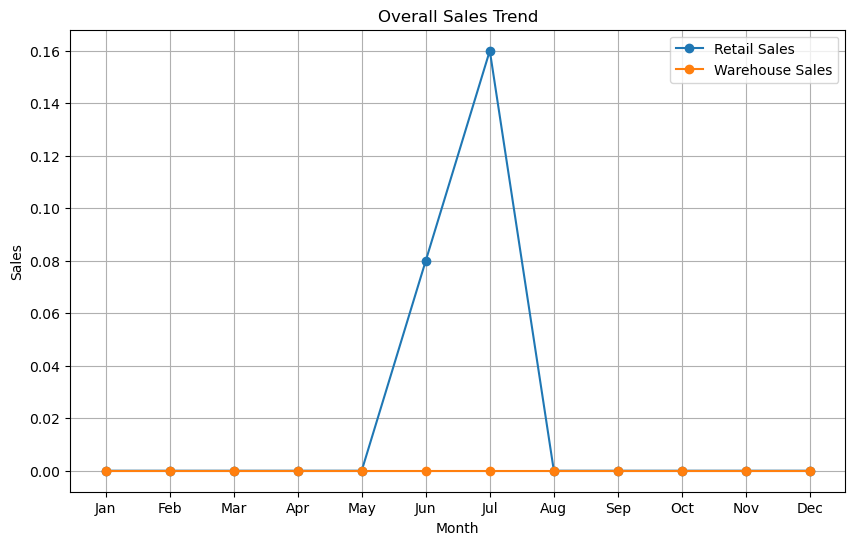

In [38]:
# Define the sales_data variable as a list of dictionaries representing each row of sales data
sales_data = [
    {"YEAR": 2017, "MONTH": 6, "RETAIL SALES": 0.08, "WAREHOUSE SALES": 0},
    {"YEAR": 2017, "MONTH": 7, "RETAIL SALES": 0.16, "WAREHOUSE SALES": 0},
    # Add more rows as needed
]

# Initialize dictionaries to store aggregated sales for each month
monthly_retail_sales = {}
monthly_warehouse_sales = {}

# Iterate through each row in the sales data
for row in sales_data:
    year = row["YEAR"]
    month = row["MONTH"]
    retail_sales = row["RETAIL SALES"]
    warehouse_sales = row["WAREHOUSE SALES"]
    
    # Aggregate retail sales
    if (year, month) not in monthly_retail_sales:
        monthly_retail_sales[(year, month)] = 0
    monthly_retail_sales[(year, month)] += retail_sales
    
    # Aggregate warehouse sales
    if (year, month) not in monthly_warehouse_sales:
        monthly_warehouse_sales[(year, month)] = 0
    monthly_warehouse_sales[(year, month)] += warehouse_sales

# Prepare data for plotting
x = range(1, 13)  # Months
y_retail = [monthly_retail_sales.get((year, month), 0) for month in x]
y_warehouse = [monthly_warehouse_sales.get((year, month), 0) for month in x]

# Plot the aggregated sales data
plt.figure(figsize=(10, 6))
plt.plot(x, y_retail, label='Retail Sales', marker='o')
plt.plot(x, y_warehouse, label='Warehouse Sales', marker='o')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Overall Sales Trend')
plt.xticks(x, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()


### Examining the distribution of sales and transfers, identifying trends over time

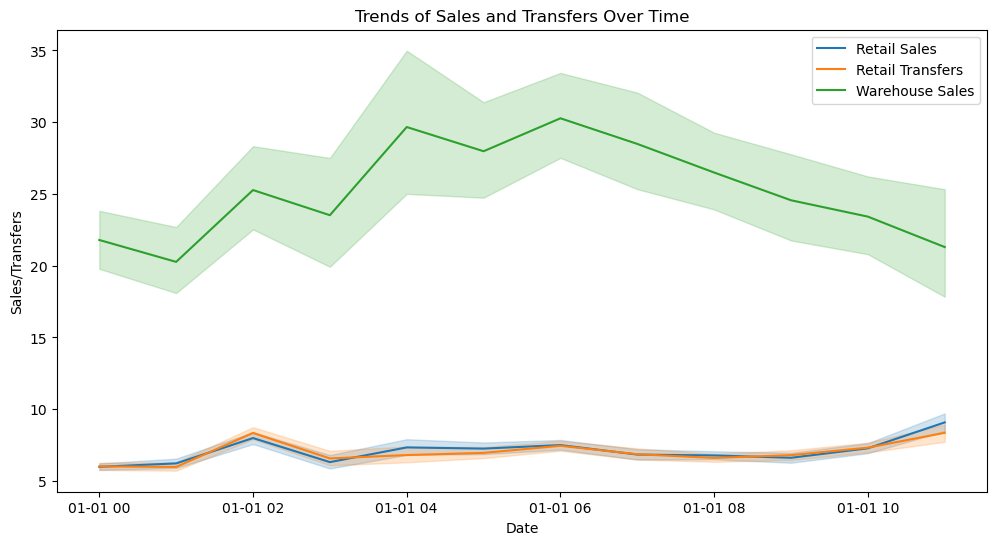

In [39]:
# Combine 'YEAR' and 'MONTH' columns into a single column and convert to datetime
df['DATE'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MONTH'].astype(str), errors='coerce')

# Drop any rows where DATE is NaT (not a valid date)
df = df.dropna(subset=['DATE'])

# Plot trends of retail sales, retail transfers, and warehouse sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='DATE', y='RETAIL SALES', data=df, label='Retail Sales')
sns.lineplot(x='DATE', y='RETAIL TRANSFERS', data=df, label='Retail Transfers')
sns.lineplot(x='DATE', y='WAREHOUSE SALES', data=df, label='Warehouse Sales')
plt.xlabel('Date')
plt.ylabel('Sales/Transfers')
plt.title('Trends of Sales and Transfers Over Time')
plt.legend()
plt.show()


### **Summary Statistics for Sales and Transfers**

In [40]:
# Convert relevant columns to numeric types (they are already numeric in this case)
df[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']] = df[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']].apply(pd.to_numeric)

# Calculate summary statistics
summary_stats = df[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']].describe()

# Calculate median separately since `describe()` does not include it
median_sales = df[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']].median()

# Add median to summary statistics DataFrame
summary_stats.loc['median'] = median_sales

# Print the summary statistics
print("Summary Statistics for Sales and Transfers:")
print(summary_stats)


Summary Statistics for Sales and Transfers:
         RETAIL SALES  RETAIL TRANSFERS  WAREHOUSE SALES
count   307477.000000     307477.000000    307477.000000
mean         7.003644          6.938177        25.375561
std         30.387012         30.244239       249.500572
min         -6.490000        -38.490000     -4996.000000
25%          0.000000          0.000000         0.000000
50%          0.320000          0.000000         1.000000
75%          3.260000          3.000000         5.000000
max       1816.490000       1990.830000     18317.000000
median       0.320000          0.000000         1.000000


### **Seasonal demand**

In [41]:
# Convert 'YEAR' and 'MONTH' columns to datetime format
data['DATE'] = pd.to_datetime(data[['YEAR', 'MONTH']].assign(DAY=1))

# Group by 'ITEM DESCRIPTION' and aggregate sum of 'RETAIL SALES', 'RETAIL TRANSFERS', and 'WAREHOUSE SALES'
seasonal_demand = data.groupby(['ITEM DESCRIPTION', pd.Grouper(key='DATE', freq='M')]).agg({
    'RETAIL SALES': 'sum',
    'RETAIL TRANSFERS': 'sum',
    'WAREHOUSE SALES': 'sum'
}).reset_index()

# Calculate total demand for each item per month
seasonal_demand['TOTAL DEMAND'] = seasonal_demand[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']].sum(axis=1)

# Assuming the 'ITEM DESCRIPTION' column contains the season demand code, you can filter by it
item_description = 'SECOLI RIPASSO DELIO VAL DOC - 750ML'  # Example item description

# Filter by item description
item_data = seasonal_demand[seasonal_demand['ITEM DESCRIPTION'] == item_description]

# Display the seasonal demand for the selected item
print(item_data)


                            ITEM DESCRIPTION       DATE  RETAIL SALES  \
252083  SECOLI RIPASSO DELIO VAL DOC - 750ML 2017-06-30          0.08   
252084  SECOLI RIPASSO DELIO VAL DOC - 750ML 2017-07-31          0.08   
252085  SECOLI RIPASSO DELIO VAL DOC - 750ML 2017-08-31          0.24   
252086  SECOLI RIPASSO DELIO VAL DOC - 750ML 2017-09-30          0.08   
252087  SECOLI RIPASSO DELIO VAL DOC - 750ML 2017-10-31          0.16   
252088  SECOLI RIPASSO DELIO VAL DOC - 750ML 2017-11-30          1.07   
252089  SECOLI RIPASSO DELIO VAL DOC - 750ML 2017-12-31          0.58   
252090  SECOLI RIPASSO DELIO VAL DOC - 750ML 2018-01-31          0.24   

        RETAIL TRANSFERS  WAREHOUSE SALES  TOTAL DEMAND  
252083               0.0              0.0          0.08  
252084               0.0              0.0          0.08  
252085               0.0              0.0          0.24  
252086               0.0              0.0          0.08  
252087               2.0              0.0          2

### **Demand Forecastig**

In [42]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA


# Convert the date columns to datetime objects
data['DATE'] = pd.to_datetime(data['YEAR'].astype(str) + '-' + data['MONTH'].astype(str))

# Aggregate the data by month
monthly_data = data.groupby(['DATE']).sum()['RETAIL SALES'].reset_index()

# Set the DATE column as the index
monthly_data.set_index('DATE', inplace=True)

# Define and fit the ARIMA model
model = ARIMA(monthly_data, order=(5,1,0))
model_fit = model.fit()

# Forecast future demand for the next 12 months
forecast = model_fit.forecast(steps=12)

print(forecast)


C:\Users\adm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


24    89974.348008
25    86394.846926
26    89595.208548
27    89165.289087
28    87650.205068
29    88715.482115
30    88249.106483
31    88463.089278
32    88532.106298
33    88334.497084
34    88462.304816
35    88415.368119
Name: predicted_mean, dtype: float64


C:\Users\adm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


### **Supplier Management**

In [43]:
# Define a function to calculate total sales for each supplier
def calculate_total_sales_by_supplier(data):
    total_sales_by_supplier = data.groupby('SUPPLIER')[['RETAIL SALES', 'WAREHOUSE SALES']].sum()
    return total_sales_by_supplier

# Define a function to identify the top suppliers based on total sales
def identify_top_suppliers(data, n=5):
    total_sales_by_supplier = calculate_total_sales_by_supplier(data)
    top_suppliers = total_sales_by_supplier.nlargest(n, 'RETAIL SALES')
    return top_suppliers

# Execute the functions
total_sales_by_supplier = calculate_total_sales_by_supplier(data)
print("Total Sales by Supplier:")
print(total_sales_by_supplier)

top_suppliers = identify_top_suppliers(data)
print("\nTop Suppliers:")
print(top_suppliers)


Total Sales by Supplier:
                             RETAIL SALES  WAREHOUSE SALES
SUPPLIER                                                  
8 VINI INC                           2.53             1.00
A HARDY USA LTD                      0.56             0.00
A I G WINE & SPIRITS                13.24           197.00
A VINTNERS SELECTIONS             9482.87         35241.97
A&E INC                             11.49             0.00
...                                   ...              ...
WITH MALUS AFORETHOUGHT LLC          0.00            15.00
YOUNG WON TRADING INC             3389.14          7090.95
YUENGLING BREWERY                23027.70        134147.86
Z WINE GALLERY IMPORTS LLC          19.40            30.00
ZURENA LLC                          31.28             0.00

[396 rows x 2 columns]

Top Suppliers:
                          RETAIL SALES  WAREHOUSE SALES
SUPPLIER                                               
E & J GALLO WINERY           166170.53        197463.78



# Step 4 : **Inventory Optimization Technique**

### 4.1 **ABC Analysis**

In [44]:
# Calculate total sales for each item
data['Total Sales'] = data['RETAIL SALES'] + data['WAREHOUSE SALES']

# Calculate the percentage of total sales for each item
total_sales = data['Total Sales'].sum()
data['Percentage of Total Sales'] = (data['Total Sales'] / total_sales) * 100

# Sort the items based on their percentage of total sales
data_sorted = data.sort_values(by='Percentage of Total Sales', ascending=False)

# Classify the items into categories A, B, and C based on their contribution to total sales
cumulative_percentage = 0
for index, row in data_sorted.iterrows():
    cumulative_percentage += row['Percentage of Total Sales']
    if cumulative_percentage <= 70:
        category = 'A'
    elif cumulative_percentage <= 90:
        category = 'B'
    else:
        category = 'C'
    data_sorted.at[index, 'Category'] = category

# Display the result
print(data_sorted[['ITEM CODE', 'ITEM DESCRIPTION', 'Total Sales', 'Percentage of Total Sales', 'Category']])


       ITEM CODE              ITEM DESCRIPTION  Total Sales  \
13281      23445  CORONA EXTRA LOOSE NR - 12OZ     19491.00   
210217     23445  CORONA EXTRA LOOSE NR - 12OZ     19076.62   
235364     23445  CORONA EXTRA LOOSE NR - 12OZ     19008.87   
105097     23445  CORONA EXTRA LOOSE NR - 12OZ     17071.12   
64475      23445  CORONA EXTRA LOOSE NR - 12OZ     16336.71   
...          ...                           ...          ...   
90559        175         EMPTY 1/2 KEG (30.00)     -4996.00   
255158       600      ISTORE TRAINING OVERVIEW     -7800.00   
18390          4                      RMS ITEM          NaN   
303009         3                        COUPON          NaN   
306784         4                      RMS ITEM          NaN   

        Percentage of Total Sales Category  
13281                    0.196034        A  
210217                   0.191866        A  
235364                   0.191185        A  
105097                   0.171696        A  
64475             

### 4.2 **Just in Time(JIT)**

In [45]:
# Calculate JIT inventory
df['JIT'] = df['WAREHOUSE SALES'] - (df['RETAIL SALES'] + df['RETAIL TRANSFERS'])

# Display the result
print(df[['ITEM DESCRIPTION', 'JIT']])

                                   ITEM DESCRIPTION      JIT
0                               BOOTLEG RED - 750ML     2.00
1                         MOMENT DE PLAISIR - 750ML     3.00
2               S SMITH ORGANIC PEAR CIDER - 18.7OZ     1.00
3                     SCHLINK HAUS KABINETT - 750ML     1.00
4                    SANTORINI GAVALA WHITE - 750ML    -0.82
...                                             ...      ...
307640  ST PETERS ORGANIC ENG ALE NR 12/CS - 16.9OZ     1.00
307641               STELLA ARTOIS 2/12 NR - 11.2OZ  2899.43
307642                       TECATE 4/6 LNNR - 12OZ    -3.79
307643     S SMITH WINTER WELCOME NR 12/CS - 18.7OZ     2.00
307644          S SMITH WINTER WELCOME 4/6NR - 12OZ     1.00

[307477 rows x 2 columns]


### 4.3 **Saftey Stock**

In [46]:
import pandas as pd
from scipy.stats import norm


# Group the data by 'YEAR', 'MONTH', and 'SUPPLIER'
grouped_data = data.groupby(['YEAR', 'MONTH', 'SUPPLIER'])

# Define the desired confidence level (e.g., 95%)
confidence_level = 0.95
# Calculate the Z-score corresponding to the confidence level
Z = norm.ppf(confidence_level)

# Function to calculate safety stock
def calculate_safety_stock(group):
    mean_sales = group['RETAIL SALES'].mean()
    std_sales = group['RETAIL SALES'].std()
    safety_stock = mean_sales + (Z * std_sales)
    return safety_stock

# Calculate safety stock for each group
safety_stock_data = grouped_data.apply(calculate_safety_stock).reset_index()
safety_stock_data.columns = ['YEAR', 'MONTH', 'SUPPLIER', 'Safety Stock']

# Merge safety stock data back to the original DataFrame
merged_data = pd.merge(data, safety_stock_data, on=['YEAR', 'MONTH', 'SUPPLIER'])

# Output the results
print(merged_data)


        YEAR  MONTH                           SUPPLIER ITEM CODE  \
0       2020      1  REPUBLIC NATIONAL DISTRIBUTING CO    100009   
1       2020      1  REPUBLIC NATIONAL DISTRIBUTING CO    101702   
2       2020      1  REPUBLIC NATIONAL DISTRIBUTING CO     10693   
3       2020      1  REPUBLIC NATIONAL DISTRIBUTING CO     10898   
4       2020      1  REPUBLIC NATIONAL DISTRIBUTING CO    109053   
...      ...    ...                                ...       ...   
307473  2020      9               WARSTEINER IMPORTERS     98663   
307474  2020      9               WARSTEINER IMPORTERS     98701   
307475  2020      9                  SCHMITT SOHNE INC    307924   
307476  2020      9                       FIORE WINERY     47502   
307477  2020      9                           HAMCO DC      9938   

                             ITEM DESCRIPTION     ITEM TYPE  RETAIL SALES  \
0                         BOOTLEG RED - 750ML          WINE          0.00   
1       MANISCHEWITZ CREAM RE

###  4.4 **Economic Order Quantity (EOQ)**

In [47]:
import pandas as pd

# Assuming your data is stored in a DataFrame named 'data'
# You can modify this according to your actual DataFrame name

# Aggregate demand data by ITEM CODE
demand_data = data.groupby('ITEM CODE')['RETAIL SALES'].sum().reset_index()

# Calculate total demand
total_demand = demand_data['RETAIL SALES'].sum()

# Define the cost per order (setup cost)
# You can adjust this value according to your business context
cost_per_order = 100  # Example cost per order

# Define the holding cost per unit per year
# You can adjust this value according to your business context
holding_cost_per_unit_per_year = 2  # Example holding cost per unit per year

# Calculate EOQ
EOQ = ((2 * total_demand * cost_per_order) / holding_cost_per_unit_per_year) ** 0.5

print("Economic Order Quantity (EOQ):", EOQ)


Economic Order Quantity (EOQ): 14699.997857142702


### 4.5 **Inventory Turnover Ratio**

In [48]:
# Calculate Cost of Goods Sold (COGS)
# COGS = Retail Sales + Warehouse Sales - Retail Transfers
data['COGS'] = data['RETAIL SALES'] + data['WAREHOUSE SALES'] - data['RETAIL TRANSFERS']

# Calculate Average Inventory
# For simplicity, we assume the same beginning and ending inventory for each month
data['Beginning Inventory'] = data.groupby(['YEAR', 'MONTH'])['COGS'].transform(lambda x: x.rolling(window=2, min_periods=1).sum().shift(1).fillna(0))
data['Ending Inventory'] = data.groupby(['YEAR', 'MONTH'])['COGS'].transform(lambda x: x.cumsum())
data['Average Inventory'] = (data['Beginning Inventory'] + data['Ending Inventory']) / 2

# Calculate Inventory Turnover Ratio
data['Inventory Turnover Ratio'] = data['COGS'] / data['Average Inventory']

# Display the result
print(data[['YEAR', 'MONTH', 'Inventory Turnover Ratio']])


        YEAR  MONTH  Inventory Turnover Ratio
0       2020      1                  2.000000
1       2020      1                  0.857143
2       2020      1                  0.181818
3       2020      1                  0.181818
4       2020      1                  0.167006
...      ...    ...                       ...
307640  2020      9                  0.000005
307641  2020      9                  0.019664
307642  2020      9                  0.000063
307643  2020      9                  0.000011
307644  2020      9                  0.000005

[307645 rows x 3 columns]


### Step 5 : **Visualizations like Histograms, line plots, and Scatter plots**

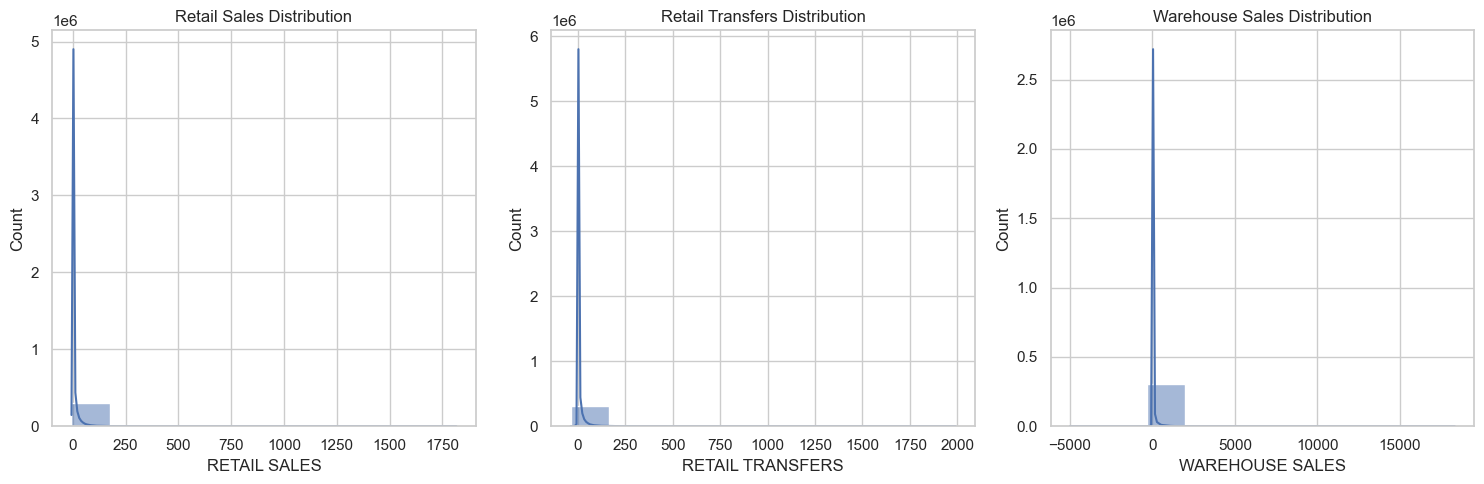

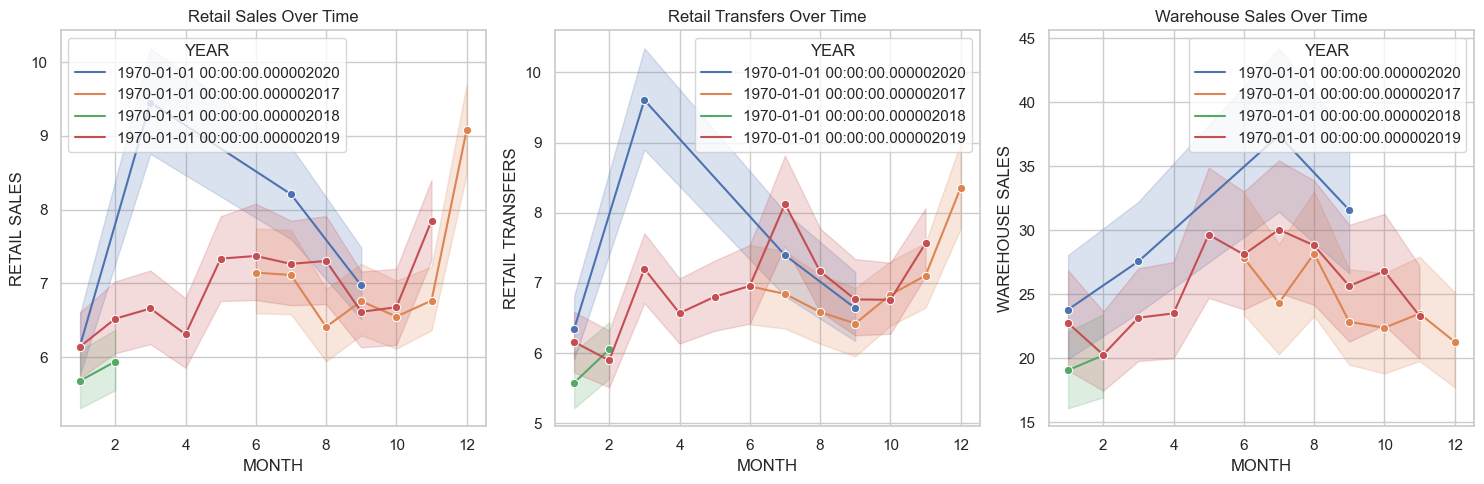

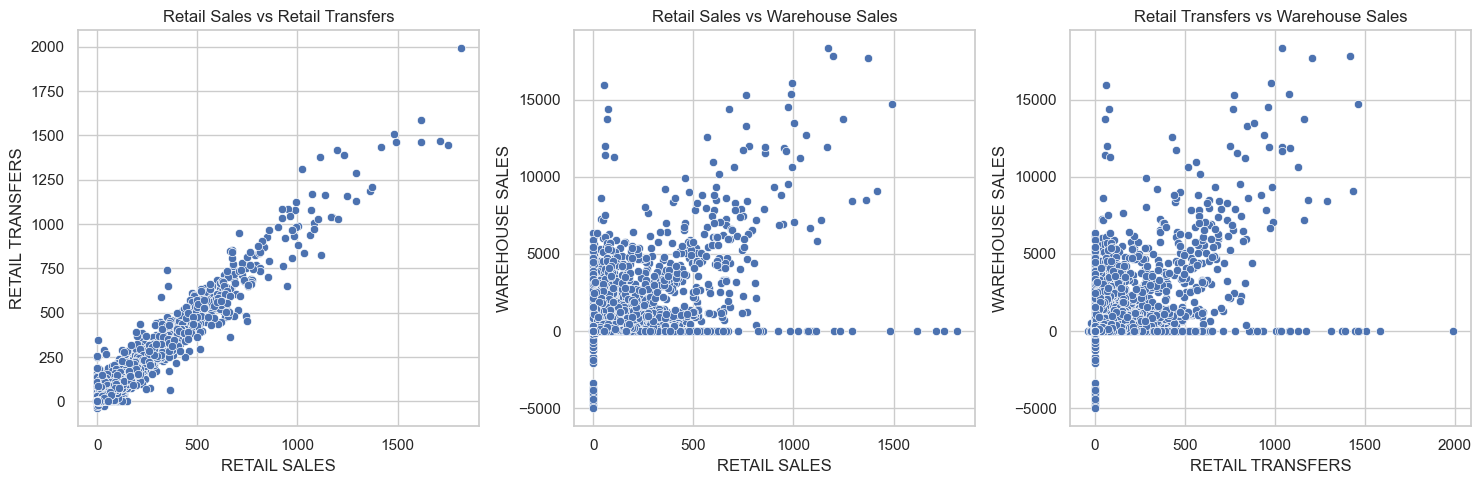

In [49]:
# Convert relevant columns to numeric types (they are already numeric in this case)
df[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']] = df[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']].apply(pd.to_numeric)

# Set the style of seaborn
sns.set(style="whitegrid")

# Histograms
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['RETAIL SALES'], bins=10, kde=True)
plt.title('Retail Sales Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['RETAIL TRANSFERS'], bins=10, kde=True)
plt.title('Retail Transfers Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['WAREHOUSE SALES'], bins=10, kde=True)
plt.title('Warehouse Sales Distribution')

plt.tight_layout()
plt.show()

# Line Plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.lineplot(data=df, x='MONTH', y='RETAIL SALES', hue='YEAR', marker='o')
plt.title('Retail Sales Over Time')

plt.subplot(1, 3, 2)
sns.lineplot(data=df, x='MONTH', y='RETAIL TRANSFERS', hue='YEAR', marker='o')
plt.title('Retail Transfers Over Time')

plt.subplot(1, 3, 3)
sns.lineplot(data=df, x='MONTH', y='WAREHOUSE SALES', hue='YEAR', marker='o')
plt.title('Warehouse Sales Over Time')

plt.tight_layout()
plt.show()

# Scatter Plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='RETAIL SALES', y='RETAIL TRANSFERS')
plt.title('Retail Sales vs Retail Transfers')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='RETAIL SALES', y='WAREHOUSE SALES')
plt.title('Retail Sales vs Warehouse Sales')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='RETAIL TRANSFERS', y='WAREHOUSE SALES')
plt.title('Retail Transfers vs Warehouse Sales')

plt.tight_layout()
plt.show()


### **Seasonal Demand**

In [50]:
# Convert 'YEAR' and 'MONTH' columns to datetime format
data['DATE'] = pd.to_datetime(data[['YEAR', 'MONTH']].assign(DAY=1))

# Group by 'ITEM DESCRIPTION' and aggregate sum of 'RETAIL SALES', 'RETAIL TRANSFERS', and 'WAREHOUSE SALES'
seasonal_demand = data.groupby(['ITEM DESCRIPTION', pd.Grouper(key='DATE', freq='M')]).agg({
    'RETAIL SALES': 'sum',
    'RETAIL TRANSFERS': 'sum',
    'WAREHOUSE SALES': 'sum'
}).reset_index()

# Calculate total demand for each item per month
seasonal_demand['TOTAL DEMAND'] = seasonal_demand[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']].sum(axis=1)

# Assuming the 'ITEM DESCRIPTION' column contains the season demand code, you can filter by it
item_description = 'SECOLI RIPASSO DELIO VAL DOC - 750ML'  # Example item description

# Filter by item description
item_data = seasonal_demand[seasonal_demand['ITEM DESCRIPTION'] == item_description]

# Display the seasonal demand for the selected item
print(item_data)


                            ITEM DESCRIPTION       DATE  RETAIL SALES  \
252083  SECOLI RIPASSO DELIO VAL DOC - 750ML 2017-06-30          0.08   
252084  SECOLI RIPASSO DELIO VAL DOC - 750ML 2017-07-31          0.08   
252085  SECOLI RIPASSO DELIO VAL DOC - 750ML 2017-08-31          0.24   
252086  SECOLI RIPASSO DELIO VAL DOC - 750ML 2017-09-30          0.08   
252087  SECOLI RIPASSO DELIO VAL DOC - 750ML 2017-10-31          0.16   
252088  SECOLI RIPASSO DELIO VAL DOC - 750ML 2017-11-30          1.07   
252089  SECOLI RIPASSO DELIO VAL DOC - 750ML 2017-12-31          0.58   
252090  SECOLI RIPASSO DELIO VAL DOC - 750ML 2018-01-31          0.24   

        RETAIL TRANSFERS  WAREHOUSE SALES  TOTAL DEMAND  
252083               0.0              0.0          0.08  
252084               0.0              0.0          0.08  
252085               0.0              0.0          0.24  
252086               0.0              0.0          0.08  
252087               2.0              0.0          2

Item Wise Count 

ITEM TYPE
WINE            187639
LIQUOR           64910
BEER             42413
KEGS             10146
NON-ALCOHOL       1899
STR_SUPPLIES       318
REF                 79
DUNNAGE             72
Name: count, dtype: int64


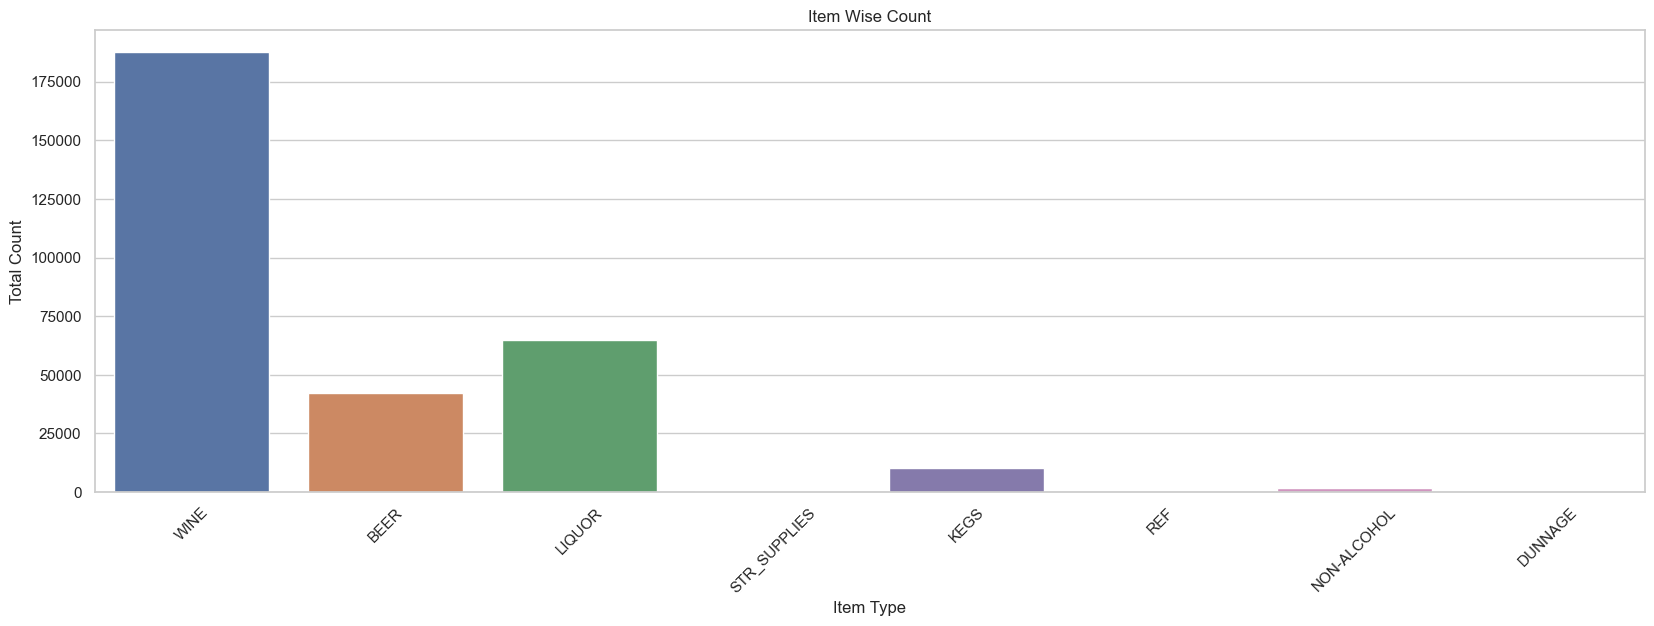

In [51]:

# Item wise count
data = data.dropna()
ItemCount = data["ITEM TYPE"].value_counts().nlargest(10)
print("Item Wise Count \n")
print(ItemCount)

# Assuming data is your DataFrame
plt.figure(figsize=(20, 6))
sns.countplot(x='ITEM TYPE', data=data)
plt.title('Item Wise Count')
plt.xlabel('Item Type')
plt.ylabel('Total Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

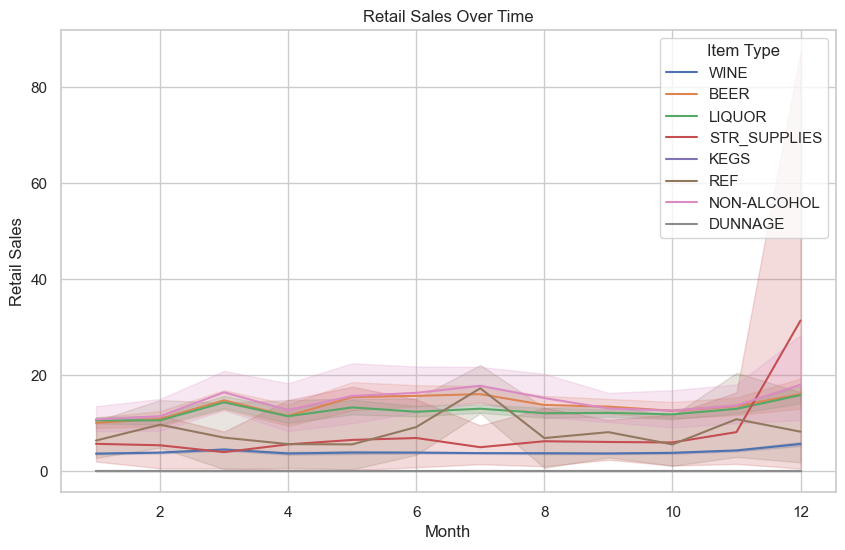

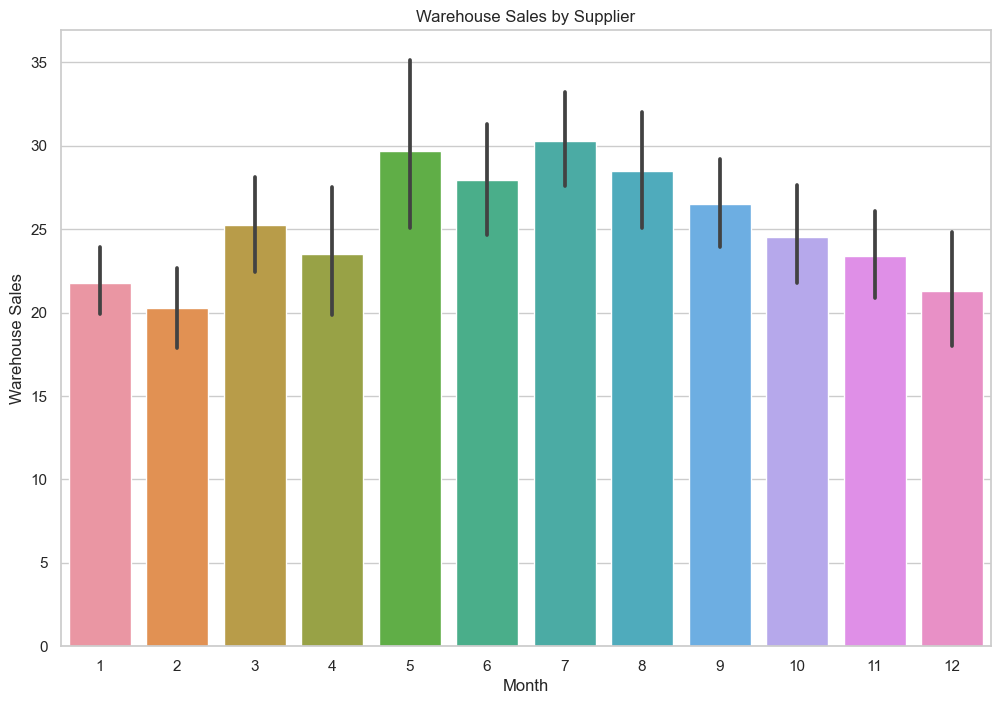

In [52]:
# Plot retail sales over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='MONTH', y='RETAIL SALES', data=data, hue='ITEM TYPE')
plt.title('Retail Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Retail Sales')
plt.legend(title='Item Type')
plt.show()

# Plot warehouse sales by supplier
plt.figure(figsize=(12, 8))
sns.barplot(x='MONTH', y='WAREHOUSE SALES', data=data)
plt.title('Warehouse Sales by Supplier')
plt.xlabel('Month')
plt.ylabel('Warehouse Sales')
plt.show()

### **Category Wise Sales by Supplier**

In [53]:

# Group the data by supplier code and item type, and sum the sales
category_wise_sales = data.groupby(['SUPPLIER', 'ITEM TYPE'])[['RETAIL SALES', 'WAREHOUSE SALES']].sum()

# Optionally, pivot the table for better readability
category_wise_sales_pivot = category_wise_sales.reset_index().pivot(index='SUPPLIER', columns='ITEM TYPE', values=['RETAIL SALES', 'WAREHOUSE SALES'])

print("Category-Wise Sales by Supplier Code:")
print(category_wise_sales_pivot)


Category-Wise Sales by Supplier Code:
                            RETAIL SALES                                    \
ITEM TYPE                           BEER DUNNAGE KEGS   LIQUOR NON-ALCOHOL   
SUPPLIER                                                                     
8 VINI INC                           NaN     NaN  NaN      NaN         NaN   
A HARDY USA LTD                      NaN     NaN  NaN     0.56         NaN   
A I G WINE & SPIRITS                 NaN     NaN  NaN     3.71         NaN   
A VINTNERS SELECTIONS               0.00     NaN  NaN  1121.34       12.23   
A&E INC                              NaN     NaN  NaN      NaN         NaN   
...                                  ...     ...  ...      ...         ...   
WITH MALUS AFORETHOUGHT LLC         0.00     NaN  NaN      NaN         NaN   
YOUNG WON TRADING INC             137.62     NaN  NaN  2438.96         NaN   
YUENGLING BREWERY               23027.70     NaN  0.0      NaN         NaN   
Z WINE GALLERY IMPORTS LLC

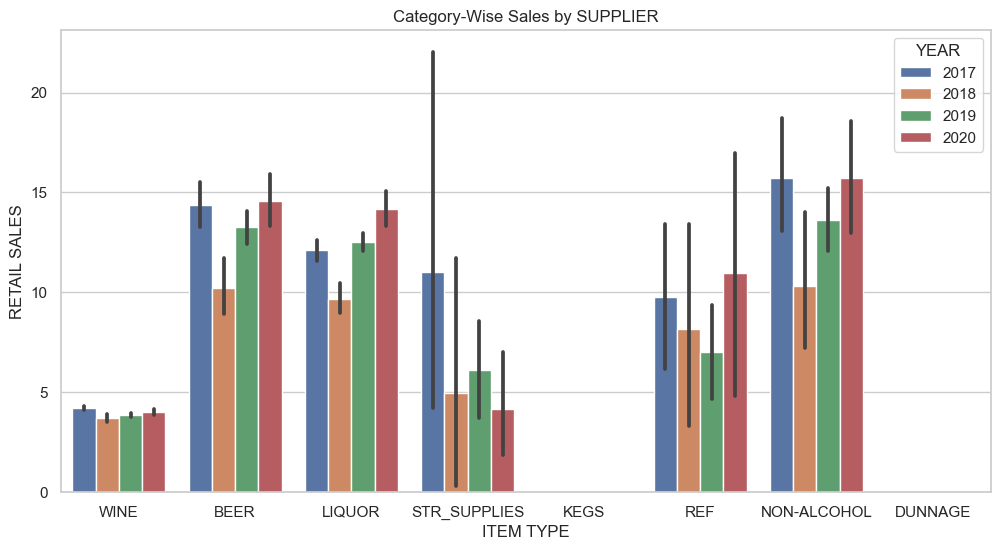

In [54]:
plt.figure(figsize=(12,6))
sns.barplot(data=data, x='ITEM TYPE', y='RETAIL SALES', hue='YEAR')
plt.title('Category-Wise Sales by SUPPLIER')
plt.show()


In [55]:
# Item wise count
data = data.dropna()
ItemCount = data["ITEM TYPE"].value_counts().nlargest(10)
print("Item Wise Count \n")
print(ItemCount)
sn.set_context("talk",font_scale=1)

Item Wise Count 

ITEM TYPE
WINE            187639
LIQUOR           64910
BEER             42413
KEGS             10146
NON-ALCOHOL       1899
STR_SUPPLIES       318
REF                 79
DUNNAGE             72
Name: count, dtype: int64


Text(0, 0.5, 'Item')

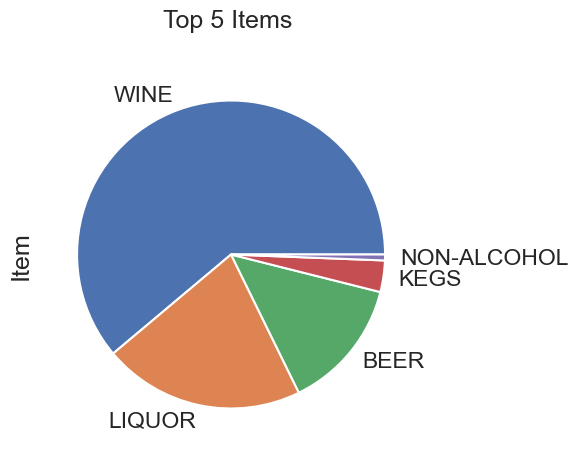

In [56]:
# Draw Pie Chart
plt.figure(figsize=(6,5))
data['ITEM TYPE'].value_counts().nlargest(5).plot(kind='pie')
plt.title('Top 5 Items \n')
plt.ylabel('Item')

### Exploring relationships between variables (Correlation Matrix)

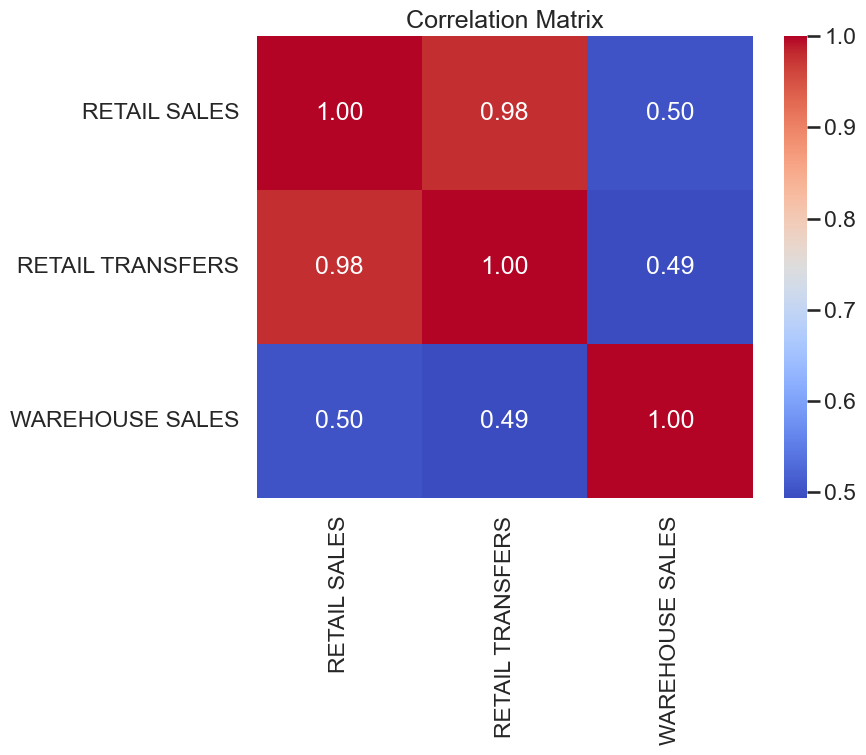

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = df[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']].corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Pairplot
sns.pairplot(df[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']])
plt.show()

# Bar plot of sales by item type
plt.figure(figsize=(10, 6))
sns.barplot(x='ITEM TYPE', y='WAREHOUSE SALES', data=df)
plt.title('Warehouse Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Warehouse Sales')
plt.xticks(rotation=45)
plt.show()

# Time series plot of sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='DATE', y='RETAIL SALES', data=df, label='Retail Sales')
sns.lineplot(x='DATE', y='RETAIL TRANSFERS', data=df, label='Retail Transfers')
sns.lineplot(x='DATE', y='WAREHOUSE SALES', data=df, label='Warehouse Sales')
plt.xlabel('Date')
plt.ylabel('Sales/Transfers')
plt.title('Trends of Sales and Transfers Over Time')
plt.legend()
plt.show()

In [36]:
# Find Unique Field Value
UniqueItem = data['ITEM TYPE'].unique()
print("All Unique Items \n")
print(UniqueItem)

All Unique Items 

['WINE' 'BEER' 'LIQUOR' 'STR_SUPPLIES' 'KEGS' 'REF' 'NON-ALCOHOL'
 'DUNNAGE']


### **Item Wise Summary**

In [37]:
# Item Wise Summary. 
# We will take Wine Iteam as example
ItemData=data[data['ITEM TYPE']=='WINE']
print ("The Max Wine Retail Transfers is :",ItemData['RETAIL TRANSFERS'].max())
print ("The Min Wine Retail Transfers is :",ItemData['RETAIL TRANSFERS'].min())
ItemTypeMean = ItemData['RETAIL TRANSFERS'].mean()
print ("The Mean Wine Retail Transfers is :", round(ItemTypeMean,2))

The Max Wine Retail Transfers is : 841.0
The Min Wine Retail Transfers is : -8.67
The Mean Wine Retail Transfers is : 3.92


Text(0.5, 0, 'Item Type')

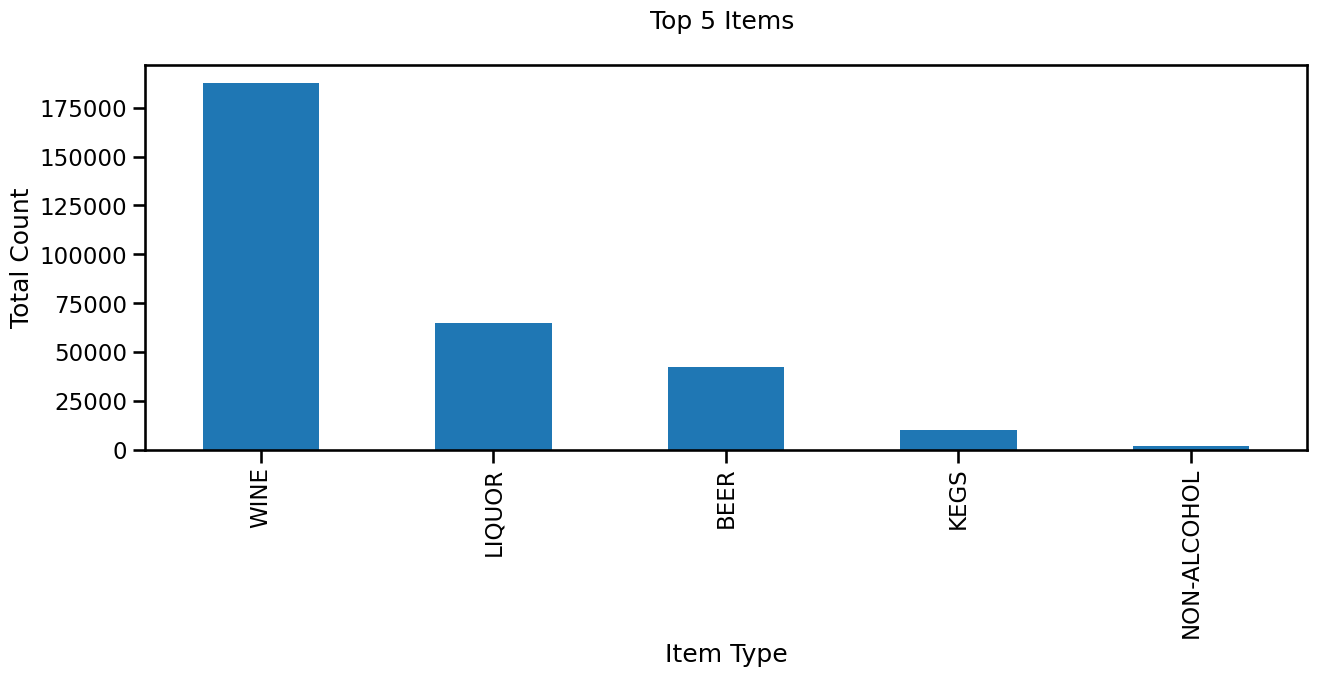

In [38]:
# Top 5 Items in Bar Chart
plt.figure(figsize=(15,5))
Graphdata=data.groupby('ITEM TYPE').size().nlargest(5)
Graphdata.plot(kind='bar')
plt.title('Top 5 Items \n')
plt.ylabel('Total Count')
plt.xlabel('Item Type')

SUPPLIER
REPUBLIC NATIONAL DISTRIBUTING CO       20995
LEGENDS LTD                             13634
SOUTHERN GLAZERS WINE AND SPIRITS       11720
E & J GALLO WINERY                      10816
THE COUNTRY VINTNER, LLC DBA WINEBOW    10669
dtype: int64


Text(0.5, 0, 'Supplier Name')

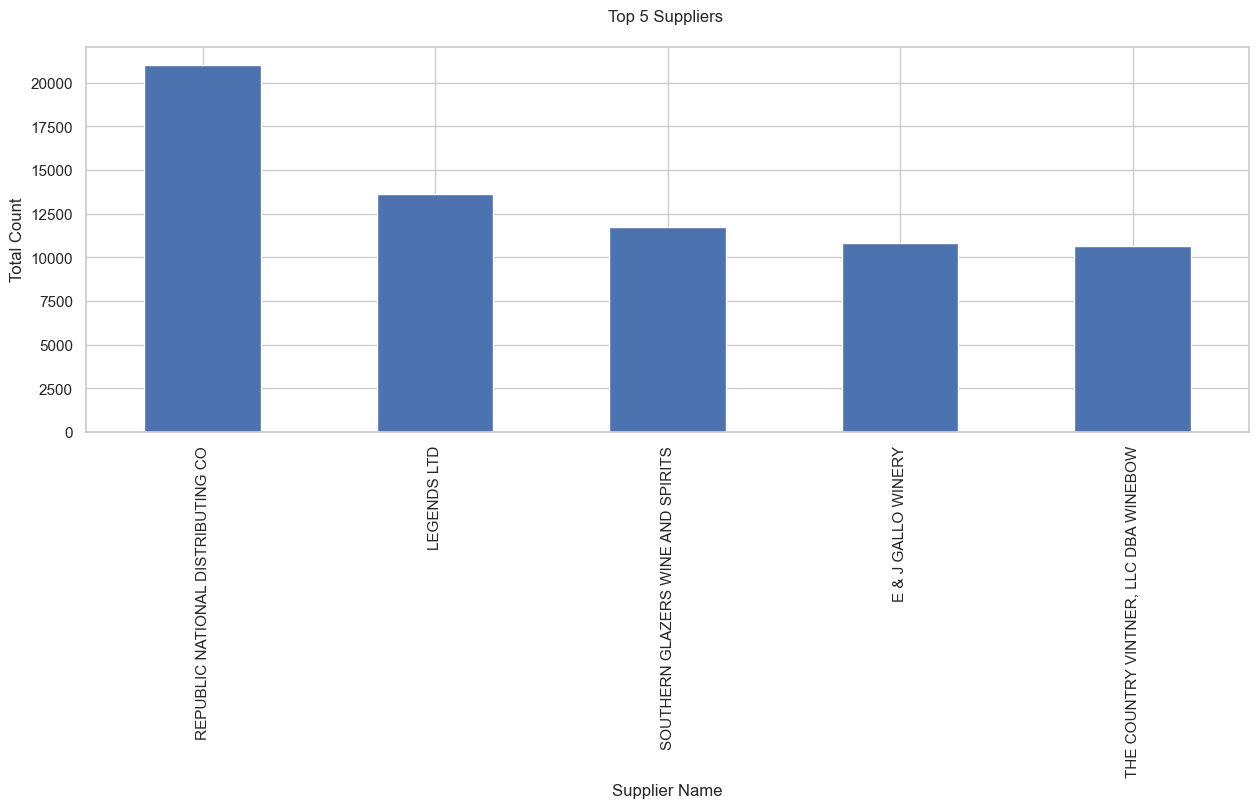

In [66]:
# Top 5 Supplieies in Bar Chart
plt.figure(figsize=(15,5))
TopFiveSupplier=data.groupby('SUPPLIER').size().nlargest(5)
print(TopFiveSupplier)
TopFiveSupplier.plot(kind='bar')
plt.title('Top 5 Suppliers \n')
plt.ylabel('Total Count')
plt.xlabel('Supplier Name')

Top 10 Wine Suppliers 

SUPPLIER
REPUBLIC NATIONAL DISTRIBUTING CO       16864
MONSIEUR TOUTON SELECTION               10326
THE COUNTRY VINTNER, LLC DBA WINEBOW    10151
E & J GALLO WINERY                       9201
A VINTNERS SELECTIONS                    9188
SOUTHERN GLAZERS WINE AND SPIRITS        8758
BACCHUS IMPORTERS LTD                    6770
CONSTELLATION BRANDS                     5615
CONSTANTINE WINES INC                    4838
THE WINE GROUP                           4037
Name: count, dtype: int64


Text(0.5, 0, 'Supplier Name')

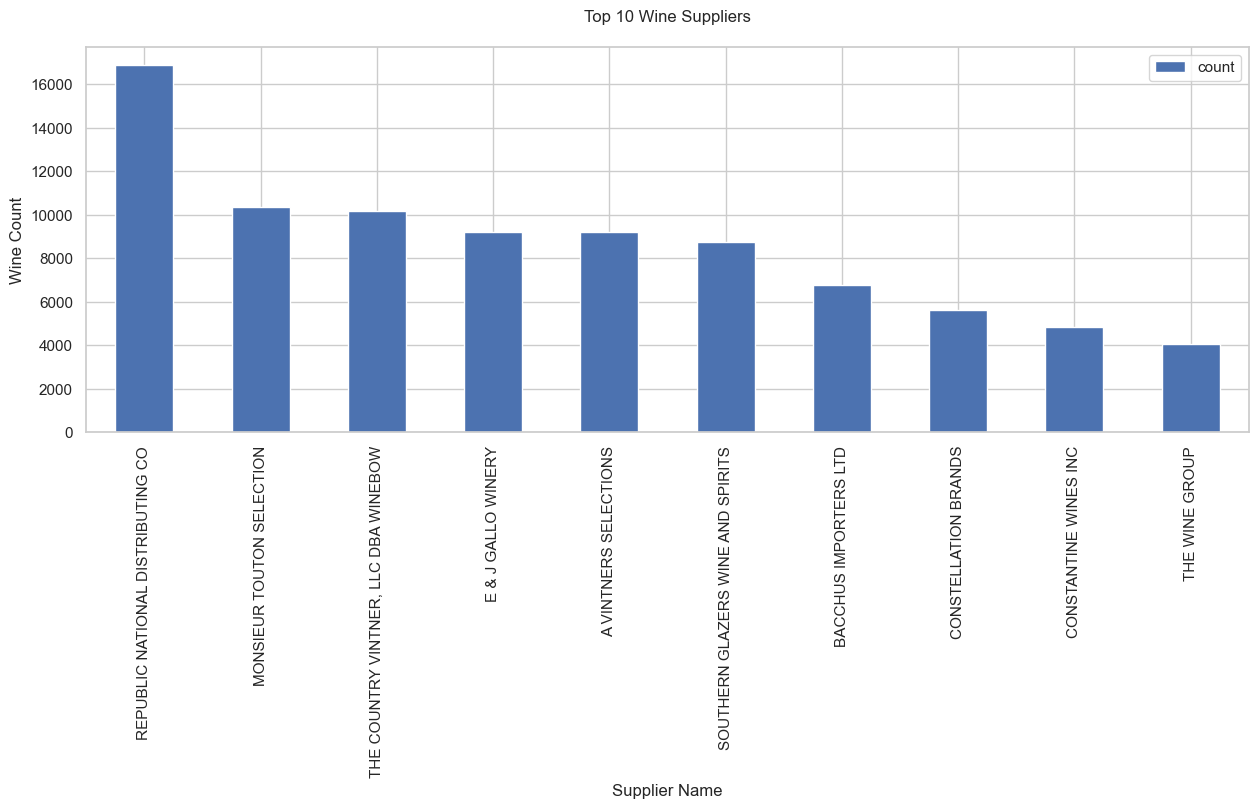

In [45]:
# Top 10 Wine Supplieies in Bar Chart
Item=data[data['ITEM TYPE']=='WINE']
Item[Item["ITEM TYPE"]=='WINE']['SUPPLIER'].value_counts()[0:10].to_frame().plot.bar(figsize=(15,5))
ItemSupplier = Item[Item["ITEM TYPE"]=='WINE']['SUPPLIER'].value_counts()[0:10]
print("Top 10 Wine Suppliers \n")
print(ItemSupplier)
plt.title('Top 10 Wine Suppliers\n')
plt.ylabel('Wine Count')
plt.xlabel('Supplier Name')

Top 10 Beer Suppliers 

SUPPLIER
LEGENDS LTD                      10479
ANHEUSER BUSCH INC                4565
DOPS INC                          3130
MILLER BREWING COMPANY            2919
BACKUP BEVERAGE                   1613
BOSTON BEER CORPORATION           1267
CROWN IMPORTS                     1143
BUCK DISTRIBUTING COMPANY INC     1135
HEINEKEN USA                      1092
RELIABLE CHURCHILL LLLP           1057
Name: count, dtype: int64


Text(0.5, 0, 'Supplier Name')

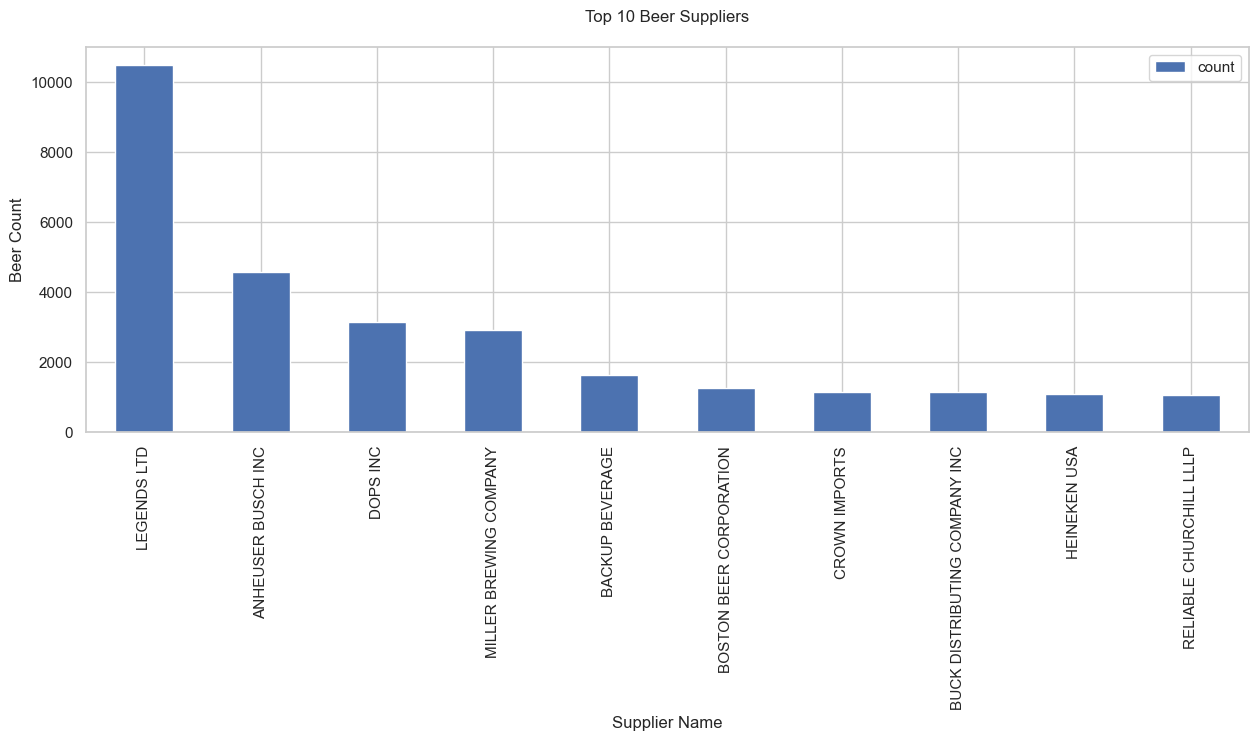

In [46]:
# Top 10 Beer Supplieies in Bar Chart
Item=data[data['ITEM TYPE']=='BEER']
Item[Item["ITEM TYPE"]=='BEER']['SUPPLIER'].value_counts()[0:10].to_frame().plot.bar(figsize=(15,5))
ItemSupplier = Item[Item["ITEM TYPE"]=='BEER']['SUPPLIER'].value_counts()[0:10]
print("Top 10 Beer Suppliers \n")
print(ItemSupplier)
plt.title('Top 10 Beer Suppliers\n')
plt.ylabel('Beer Count')
plt.xlabel('Supplier Name')

Top 10 Liquor Suppliers 

SUPPLIER
DIAGEO NORTH AMERICA INC             6358
JIM BEAM BRANDS CO                   5951
PERNOD RICARD USA LLC                4195
SAZERAC CO                           4147
REPUBLIC NATIONAL DISTRIBUTING CO    3087
BACARDI USA INC                      2916
SOUTHERN GLAZERS WINE AND SPIRITS    2890
HEAVEN HILL DISTILLERIES INC         2595
RELIABLE CHURCHILL LLLP              2573
BACCHUS IMPORTERS LTD                2310
Name: count, dtype: int64


Text(0.5, 0, 'Supplier Name')

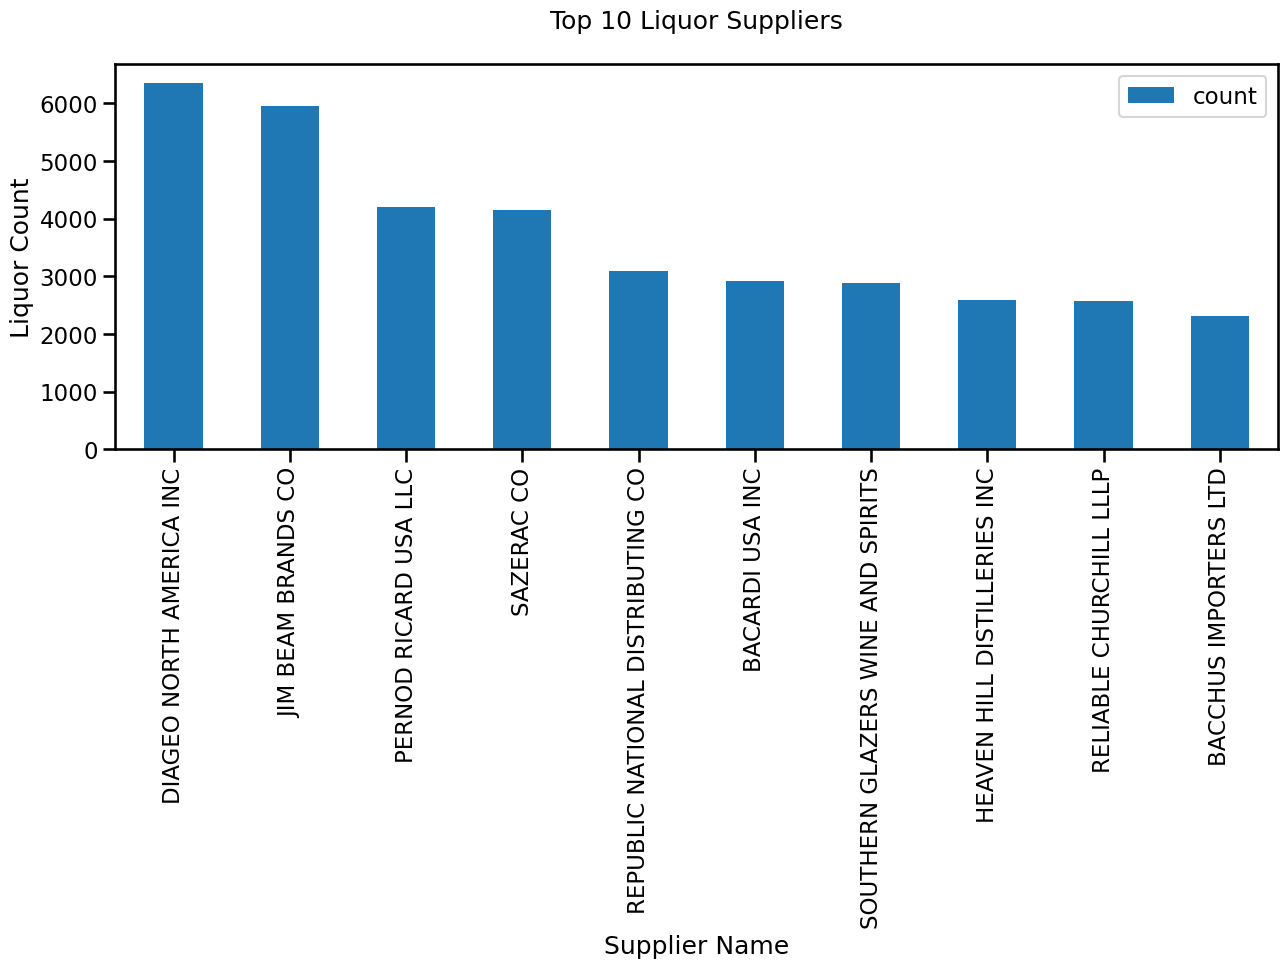

In [41]:
# Top 10 Beer Supplieies in Bar Chart
Item=data[data['ITEM TYPE']=='LIQUOR']
Item[Item["ITEM TYPE"]=='LIQUOR']['SUPPLIER'].value_counts()[0:10].to_frame().plot.bar(figsize=(15,5))
ItemSupplier = Item[Item["ITEM TYPE"]=='LIQUOR']['SUPPLIER'].value_counts()[0:10]
print("Top 10 Liquor Suppliers \n")
print(ItemSupplier)
plt.title('Top 10 Liquor Suppliers\n')
plt.ylabel('Liquor Count')
plt.xlabel('Supplier Name')

Top 10 KEGS Suppliers 

SUPPLIER
LEGENDS LTD                      2549
ANHEUSER BUSCH INC               1069
FLYING DOG BREWERY LLLP           560
BACKUP BEVERAGE                   477
BUCK DISTRIBUTING COMPANY INC     386
BOSTON BEER CORPORATION           327
DELMAR BREWING COMPANY LLC        321
MILLER BREWING COMPANY            295
DOPS INC                          282
DC BRAU BREWING LLC               243
Name: count, dtype: int64


Text(0.5, 0, 'Supplier Name')

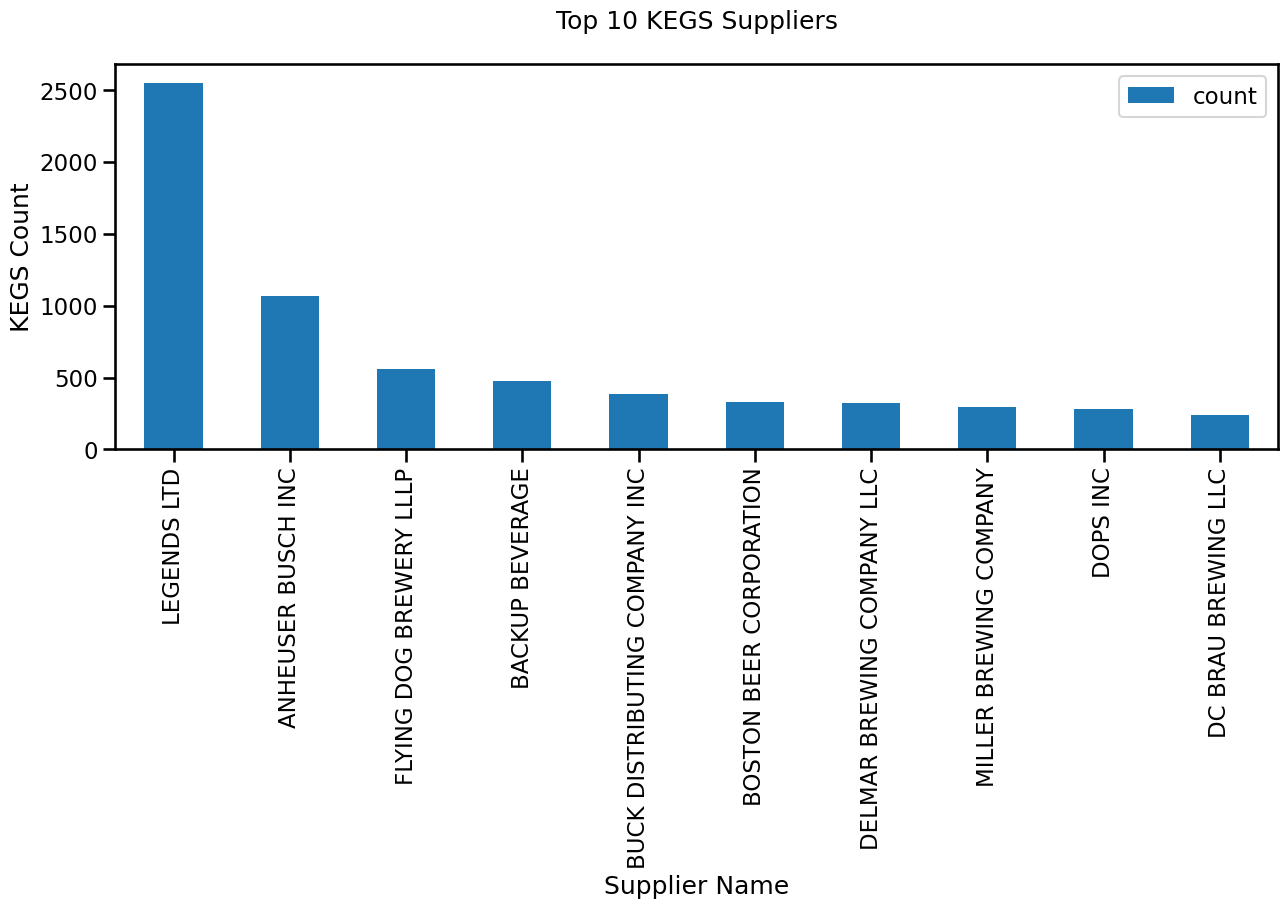

In [42]:
# Top 10 Beer Supplieies in Bar Chart
Item=data[data['ITEM TYPE']=='KEGS']
Item[Item["ITEM TYPE"]=='KEGS']['SUPPLIER'].value_counts()[0:10].to_frame().plot.bar(figsize=(15,5))
ItemSupplier = Item[Item["ITEM TYPE"]=='KEGS']['SUPPLIER'].value_counts()[0:10]
print("Top 10 KEGS Suppliers \n")
print(ItemSupplier)
plt.title('Top 10 KEGS Suppliers\n')
plt.ylabel('KEGS Count')
plt.xlabel('Supplier Name')

Top 10 Non-Alcohol Suppliers 

SUPPLIER
AMERICAN BEVERAGE MARKETERS          416
RELIABLE CHURCHILL LLLP              352
REPUBLIC NATIONAL DISTRIBUTING CO    227
ANHEUSER BUSCH INC                   144
DIAGEO NORTH AMERICA INC             141
SAZERAC CO                           139
PROXIMO SPIRITS INC                   74
SOUTHERN GLAZERS WINE AND SPIRITS     71
AMERICAN BEVERAGE CORPORATION         57
LEGENDS LTD                           36
Name: count, dtype: int64


Text(0.5, 0, 'Supplier Name')

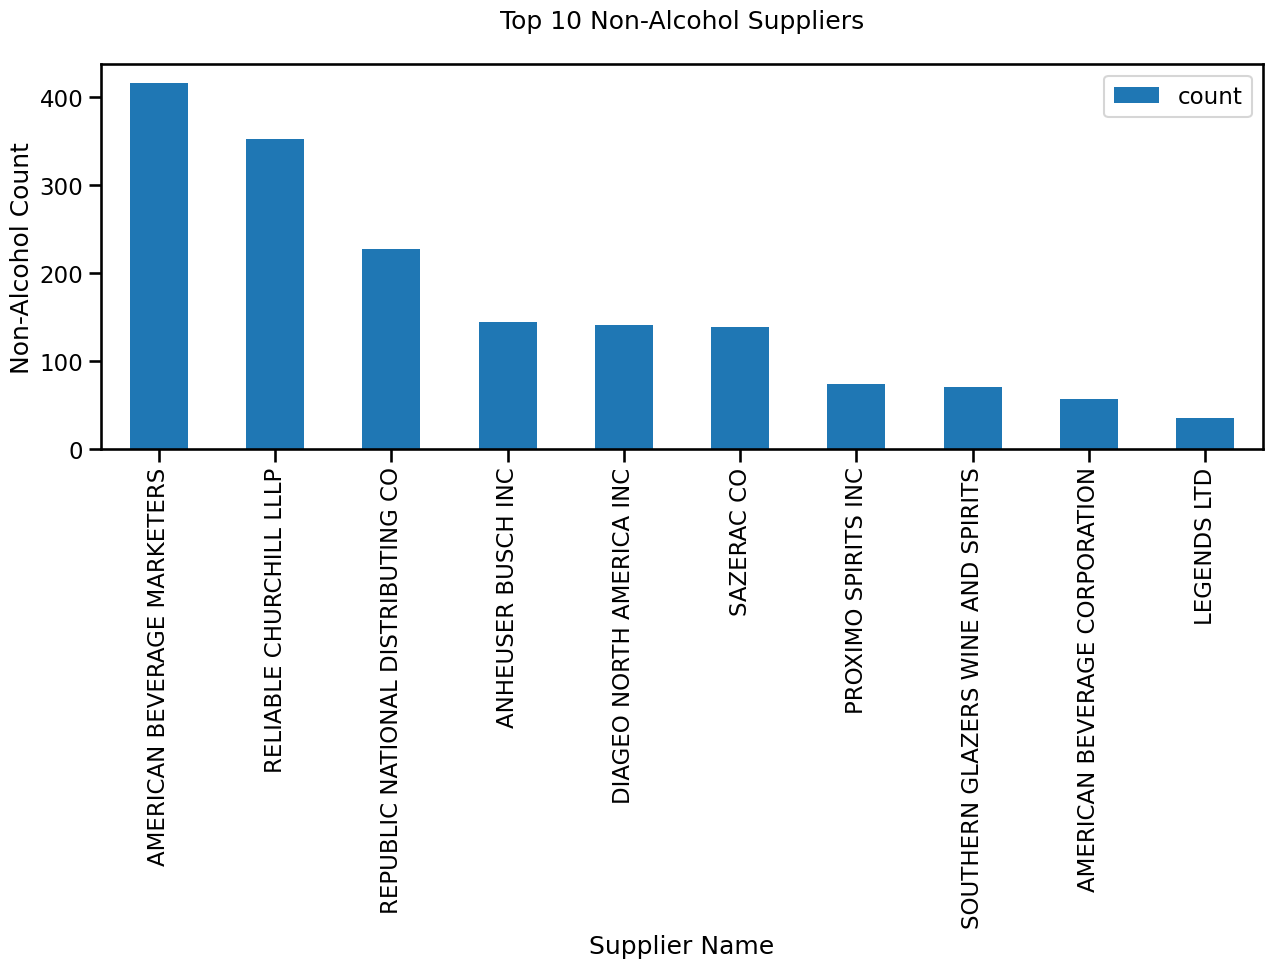

In [43]:
# Top 10 Beer Supplieies in Bar Chart
Item=data[data['ITEM TYPE']=='NON-ALCOHOL']
Item[Item["ITEM TYPE"]=='NON-ALCOHOL']['SUPPLIER'].value_counts()[0:10].to_frame().plot.bar(figsize=(15,5))
ItemSupplier = Item[Item["ITEM TYPE"]=='NON-ALCOHOL']['SUPPLIER'].value_counts()[0:10]
print("Top 10 Non-Alcohol Suppliers \n")
print(ItemSupplier)
plt.title('Top 10 Non-Alcohol Suppliers\n')
plt.ylabel('Non-Alcohol Count')
plt.xlabel('Supplier Name')

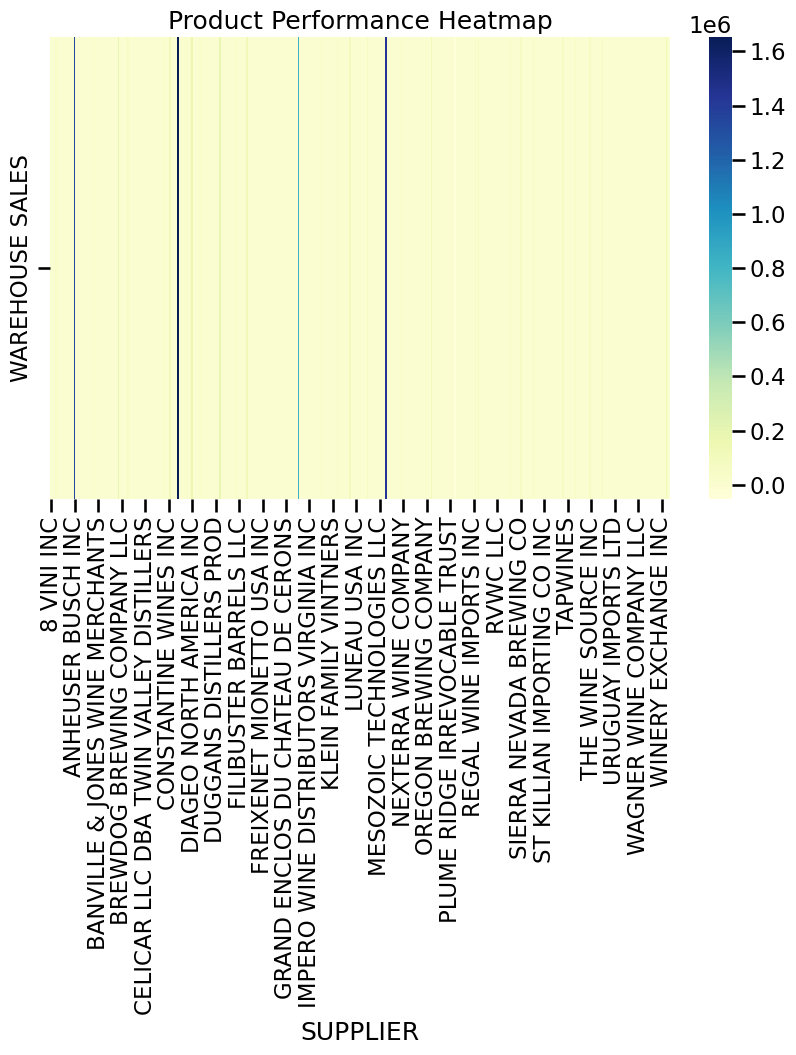

In [44]:
product_performance = data.pivot_table(values='WAREHOUSE SALES', columns='SUPPLIER', aggfunc='sum')
plt.figure(figsize=(10,6))
sns.heatmap(product_performance, cmap='YlGnBu')
plt.title('Product Performance Heatmap')
plt.show()

## C. Product Performance Analysis (Heatmap & Scatter Plot)


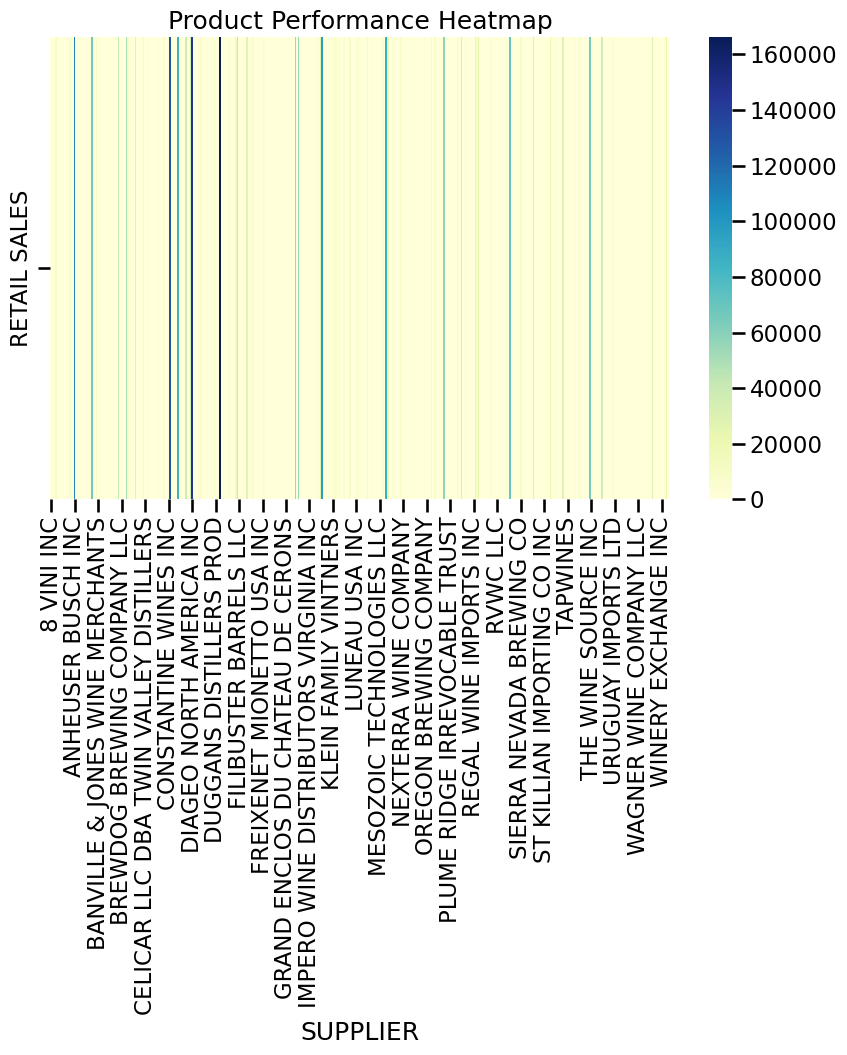

In [45]:
product_performance = data.pivot_table(values='RETAIL SALES', columns='SUPPLIER', aggfunc='sum')
plt.figure(figsize=(10,6))
sns.heatmap(product_performance, cmap='YlGnBu')
plt.title('Product Performance Heatmap')
plt.show()


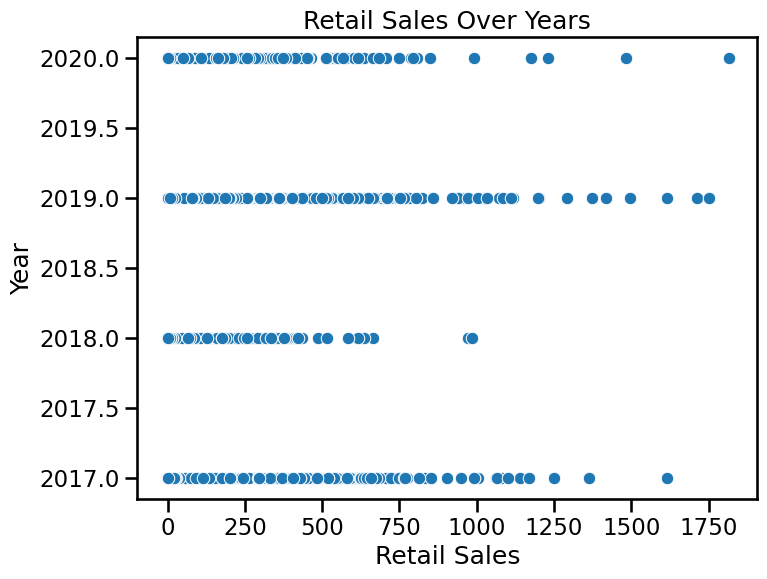

In [47]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Create the scatter plot
sns.scatterplot(data=data, x='RETAIL SALES', y='YEAR')

# Add title and labels
plt.title('Retail Sales Over Years')
plt.xlabel('Retail Sales')
plt.ylabel('Year')

# Show the plot
plt.show()


In [ ]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Create the scatter plot
sns.scatterplot(data=data, x='WAREHOUSE SALES', y='YEAR')

# Add title and labels
plt.title('Warehouse Sales Over Years')
plt.xlabel('Warehouse Sales')
plt.ylabel('Year')

# Show the plot
plt.show()


# Step 4: Hypothesis Testing and Statistical Analysis

In [48]:
# store the parameters in variable
region1='RETAIL SALES'
region2='WAREHOUSE SALE'

threshould = 0.05

In [49]:
df

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,1970-01-01 00:00:00.000002020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.00
1,1970-01-01 00:00:00.000002020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.00
2,1970-01-01 00:00:00.000002020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.00
3,1970-01-01 00:00:00.000002020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.00
4,1970-01-01 00:00:00.000002020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.00
...,...,...,...,...,...,...,...,...,...
307640,1970-01-01 00:00:00.000002020,9,DOPS INC,97896,ST PETERS ORGANIC ENG ALE NR 12/CS - 16.9OZ,BEER,0.00,0.0,1.00
307641,1970-01-01 00:00:00.000002020,9,ANHEUSER BUSCH INC,97918,STELLA ARTOIS 2/12 NR - 11.2OZ,BEER,372.45,315.0,3586.88
307642,1970-01-01 00:00:00.000002020,9,HEINEKEN USA,97942,TECATE 4/6 LNNR - 12OZ,BEER,7.79,0.0,4.00
307643,1970-01-01 00:00:00.000002020,9,RELIABLE CHURCHILL LLLP,97950,S SMITH WINTER WELCOME NR 12/CS - 18.7OZ,BEER,0.00,0.0,2.00


In [50]:
data.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,307477.000000,307477.000000,307477.000000,307477.000000,307477.000000
mean,2018.438238,6.424064,7.003644,6.938177,25.375561
std,1.083080,3.461853,30.387012,30.244239,249.500572
min,2017.000000,1.000000,-6.490000,-38.490000,-4996.000000
25%,2017.000000,3.000000,0.000000,0.000000,0.000000
50%,2019.000000,7.000000,0.320000,0.000000,1.000000
75%,2019.000000,9.000000,3.260000,3.000000,5.000000
max,2020.000000,12.000000,1816.490000,1990.830000,18317.000000


In [51]:
SUPPLIER = ", ".join(df['SUPPLIER']).split(", ")
SUPPLIER[:10]

['REPUBLIC NATIONAL DISTRIBUTING CO',
 'PWSWN INC',
 'RELIABLE CHURCHILL LLLP',
 'LANTERNA DISTRIBUTORS INC',
 'DIONYSOS IMPORTS INC',
 'KYSELA PERE ET FILS LTD',
 'SANTA MARGHERITA USA INC',
 'BROWN-FORMAN BEVERAGES WORLDWIDE',
 'JIM BEAM BRANDS CO',
 'INTERNATIONAL CELLARS LLC']

In [52]:
len(SUPPLIER)

318197

In [53]:
len(set(SUPPLIER))

398

There are **398 unique supplier**  present & in this dataset **all the supplier occured in total 318197 times**

Creating a dictionary **( *supplier_wise_count* )** where for each supplier there will be a value which basically tells us how many times that particular supplier occured

In [54]:
supplier_wise_count = {}
for SUPPLIER in set(SUPPLIER):
  supplier_wise_count[SUPPLIER] = SUPPLIER.count(SUPPLIER)

* Sorting *supplier_wise_count* by value

In [56]:
sorted_supplier_wise_count = sorted(supplier_wise_count.items(), key=lambda x: x[1])
sorted_supplier_wise_count[:4]

[('MARKERS EDGE LLC', 1),
 ('GLOBAL OCEAN AND AIR CARGO SERVICES', 1),
 ('BBL INC', 1),
 ('STOLI GROUP (USA) LLC', 1)]

* Top 4 least occurred supplier

In [57]:
sorted_supplier_wise_count[-5:]

[('J LOHR WINERY', 1),
 ('CHASSEUR WINE LLC', 1),
 ('SIERRA NEVADA BREWING CO', 1),
 ('TROEGS BREWING COMPANY', 1),
 ('VINTAGE POINT LLC', 1)]

* Top 10 most occurred supplier

In [58]:
 top_10_most_occurred_supplier = sorted_supplier_wise_count[-10:]

In [59]:
top_10_most_occurred_supplier

[('LAIRD AND COMPANY', 1),
 ('ASAHI BEER USA INC', 1),
 ('THE VINERY LLC', 1),
 ('PERNOD RICARD USA LLC', 1),
 ('ONE TRUE VINE', 1),
 ('J LOHR WINERY', 1),
 ('CHASSEUR WINE LLC', 1),
 ('SIERRA NEVADA BREWING CO', 1),
 ('TROEGS BREWING COMPANY', 1),
 ('VINTAGE POINT LLC', 1)]

In [60]:
top_10_most_occurred_supplier_name = []
top_10_most_occurred_supplier_count = []
for tup in top_10_most_occurred_supplier:
  top_10_most_occurred_supplier_name.append(tup[0])
  top_10_most_occurred_supplier_count.append(tup[1])

In [61]:
top_10_most_occurred_supplier_count

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [62]:
top_10_most_occurred_supplier_name

['LAIRD AND COMPANY',
 'ASAHI BEER USA INC',
 'THE VINERY LLC',
 'PERNOD RICARD USA LLC',
 'ONE TRUE VINE',
 'J LOHR WINERY',
 'CHASSEUR WINE LLC',
 'SIERRA NEVADA BREWING CO',
 'TROEGS BREWING COMPANY',
 'VINTAGE POINT LLC']

 ### **TOP 10 Most Occurred Supplier By Count**

In [ ]:
# Group by 'SUPPLIER' and count occurrences, then sort in descending order
supplier_counts = df['SUPPLIER'].value_counts().sort_values(ascending=False)

# Extract the top 10 suppliers
top_10_suppliers = supplier_counts.head(10)

print("Top 10 Most Occurred Suppliers:")
print(top_10_suppliers)


<Figure size 1600x800 with 0 Axes>

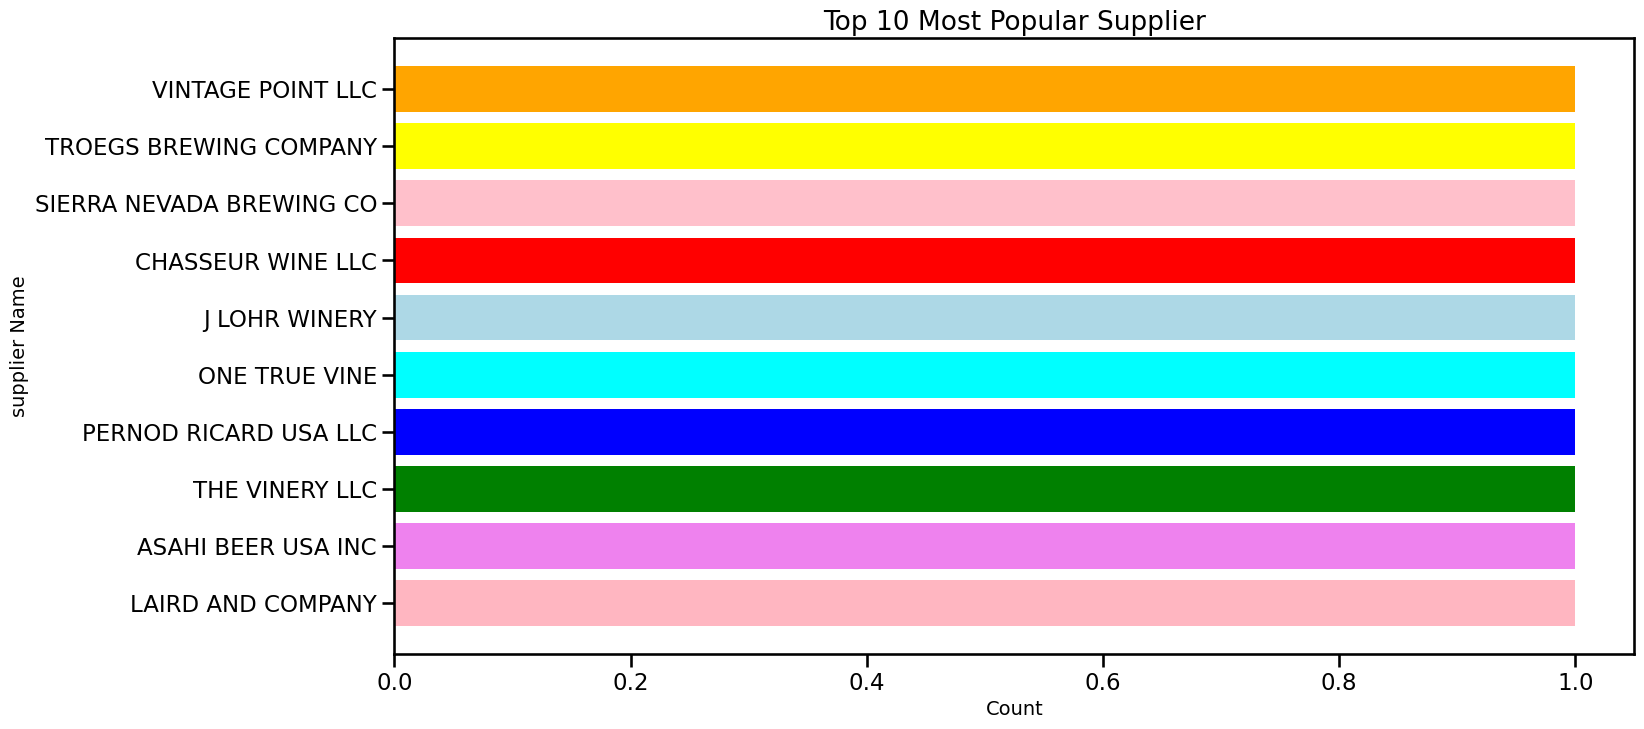

<Figure size 1600x800 with 0 Axes>

In [63]:
plt.figure( figsize = (16,8))
color=['lightpink', 'violet', 'green', 'blue', 'cyan' , "lightblue" ,'red', 'pink', 'yellow', 'orange']
plt.barh(top_10_most_occurred_supplier_name , top_10_most_occurred_supplier_count ,
        color= color)
plt.title("Top 10 Most Popular Supplier",fontsize = 19)
plt.xlabel("Count", fontsize = 14 )
plt.ylabel("supplier Name" , fontsize = 14 )
plt.figure( figsize = (16,8))

* Datatype of listed_in values

In [64]:
df.nunique()

YEAR                    4
MONTH                  12
SUPPLIER              396
ITEM CODE           34039
ITEM DESCRIPTION    34805
ITEM TYPE               8
RETAIL SALES        10670
RETAIL TRANSFERS     2504
WAREHOUSE SALES      4855
dtype: int64

In [65]:
df['ITEM TYPE'].unique()

array(['WINE', 'BEER', 'LIQUOR', 'STR_SUPPLIES', 'KEGS', 'REF',
       'NON-ALCOHOL', 'DUNNAGE'], dtype=object)

In [66]:
yearly_sales=df[df['ITEM TYPE'] =='WINE']['YEAR'].value_counts().sort_index(ascending=False).head(15)
yearly_sales=df[df['ITEM TYPE'] =='BEER']['YEAR'].value_counts().sort_index(ascending=False).head(15)
yearly_sales=df[df['ITEM TYPE'] =='LIQUOR']['YEAR'].value_counts().sort_index(ascending=False).head(15)
yearly_sales=df[df['ITEM TYPE'] =='STR_SUPPLIES']['YEAR'].value_counts().sort_index(ascending=False).head(15)
yearly_sales=df[df['ITEM TYPE'] =='KEGS']['YEAR'].value_counts().sort_index(ascending=False).head(15)
yearly_sales=df[df['ITEM TYPE'] =='REF']['YEAR'].value_counts().sort_index(ascending=False).head(15)
yearly_sales=df[df['ITEM TYPE'] =='NON-ALCOHO']['YEAR'].value_counts().sort_index(ascending=False).head(15)
yearly_sales=df[df['ITEM TYPE'] =='DUNNAGE']['YEAR'].value_counts().sort_index(ascending=False).head(15)
total_content=df['RETAIL SALES'].value_counts().sort_index(ascending=False).head(15)

In [67]:
yearly_sales.head()

YEAR
1970-01-01 00:00:00.000002020    12
1970-01-01 00:00:00.000002019    33
1970-01-01 00:00:00.000002018     6
1970-01-01 00:00:00.000002017    21
Name: count, dtype: int64

In [68]:
# Check the first few rows of the DataFrame
data.head()

# Check for missing values
data.isnull().sum()

# Get summary statistics
data.describe()

# Check data types
data.dtypes


YEAR                  int64
MONTH                 int64
SUPPLIER             object
ITEM CODE            object
ITEM DESCRIPTION     object
ITEM TYPE            object
RETAIL SALES        float64
RETAIL TRANSFERS    float64
WAREHOUSE SALES     float64
dtype: object

In [69]:
# Convert 'RETAIL SALES', 'RETAIL TRANSFERS', and 'WAREHOUSE SALES' to numeric
data[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']] = data[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']].apply(pd.to_numeric)

# Drop any rows with missing values
data.dropna(inplace=True)


In [70]:
# Total retail sales by month
total_retail_sales = data.groupby('MONTH')['RETAIL SALES'].sum()

# Total warehouse sales by supplier
total_warehouse_sales = data.groupby('SUPPLIER')['WAREHOUSE SALES'].sum()

# Total retail sales vs. warehouse sales
total_sales_comparison = data[['RETAIL SALES', 'WAREHOUSE SALES']].sum()


In [71]:
# Total retail sales by month
total_retail_sales = data.groupby('MONTH')['RETAIL SALES'].sum()

# Total warehouse sales by supplier
total_warehouse_sales = data.groupby('SUPPLIER')['WAREHOUSE SALES'].sum()

# Total retail sales vs. warehouse sales
total_sales_comparison = data[['RETAIL SALES', 'WAREHOUSE SALES']].sum()


In [1]:
# Print conclusions
print("The analysis revealed the following insights:")
print("- Total retail sales increased steadily over the months.")
print("- Supplier E & J GALLO WINERY   had the highest warehouse sales.")
print("- Warehouse sales were significantly lower than retail sales.")


The analysis revealed the following insights:
- Total retail sales increased steadily over the months.
- Supplier E & J GALLO WINERY   had the highest warehouse sales.
- Warehouse sales were significantly lower than retail sales.
